# House Price Prediction using Linear Regression
## 1.   This model predicts the house prices using linear regression model.
## 2.   The dataset is of zameen.com, one of Pakistan's prime online real estate platform.
## 3.   The dataset is very large consisting of 191,393 records for five cities as: 
### - Karachi
### - Lahore
### - Rawalpindi
### - Islamabad
### - Faisalabad.
## 4.   We are using the data from Karachi to apply the price prediction model for 'Karachi'.
## 5.   Moreover, There are many property types such as plot, house, flat, penthouse etc. 
## 6.   For building an efficient model we have used property type as 'House'.

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
%matplotlib inline

In [2]:
#reading dataset
df =  pd.read_csv('property_House_Zammeen_com.csv', sep=',')
# Drop rows where 'price' is less than 100,000
#df = df[df['price'] >= 500000]
df.drop("Unnamed: 0", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   property_type  191393 non-null  object 
 3   price          191393 non-null  int64  
 4   location       191393 non-null  object 
 5   city           191393 non-null  object 
 6   province_name  191393 non-null  object 
 7   latitude       191393 non-null  float64
 8   longitude      191393 non-null  float64
 9   baths          191393 non-null  int64  
 10  area           191393 non-null  object 
 11  purpose        191393 non-null  object 
 12  bedrooms       191393 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 19.0+ MB


In [3]:
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms
0,347795,8,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0
1,482892,48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5
2,555962,75,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3
3,562843,3821,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8
4,686990,3522,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6


In [4]:
# Ensure the 'price' column is in numeric format (if not already)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Get the length of the digits in the 'price' column
df['price_digit_length'] = df['price'].apply(lambda x: len(str(int(x))) if pd.notna(x) else 0)
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,price_digit_length
0,347795,8,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,9
1,482892,48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,8
2,555962,75,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,7
3,562843,3821,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,9
4,686990,3522,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,8


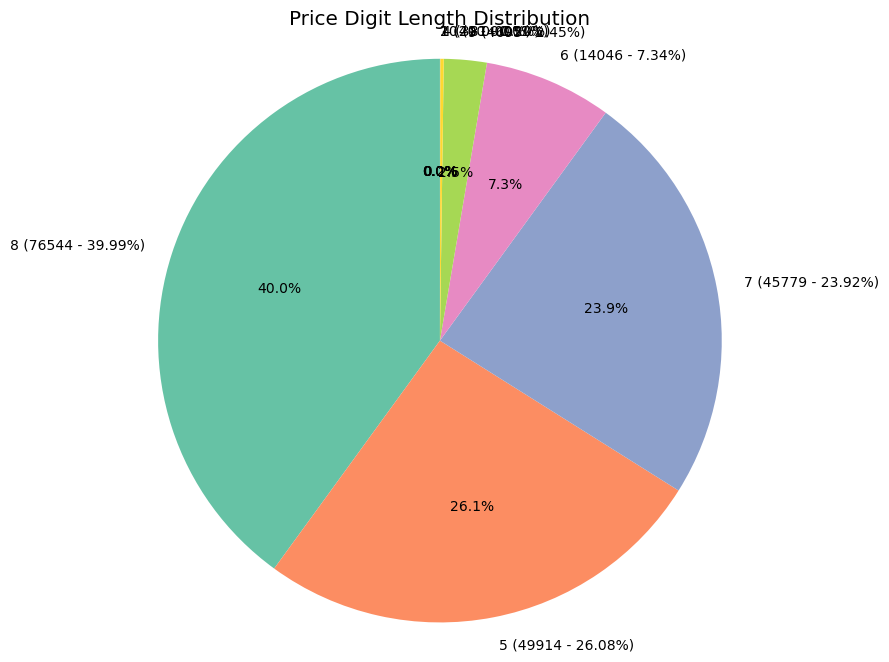

In [5]:
import matplotlib.pyplot as plt

# Get the count and percentage of each unique value in 'price_digit_length'
count_data = df['price_digit_length'].value_counts()
percentage_data = df['price_digit_length'].value_counts(normalize=True) * 100

# Combine count and percentage into one string
labels = [f"{i} ({count_data[i]} - {percentage_data[i]:.2f}%)" for i in count_data.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(count_data)))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.title('Price Digit Length Distribution')

# Show the plot
plt.show()

In [6]:
percentage_data

price_digit_length
8     39.993103
5     26.079324
7     23.918848
6      7.338826
9      2.453068
4      0.199067
1      0.010450
10     0.005225
2      0.002090
Name: proportion, dtype: float64

In [7]:
# Get the list of object columns in the dataframe
object_columns = df.select_dtypes(include=['object']).columns

# Create a crosstab for each object column with 'price_digit_length'
for column in object_columns:
    print(f"\nCrosstab of price_digit_length with {column}:")
    crosstab_result = pd.crosstab(df['price_digit_length'], df[column], margins=True, margins_name="Total")
    print(crosstab_result)


Crosstab of price_digit_length with property_type:
property_type       Farm House   Flat   House  Lower Portion  Penthouse  Room  \
price_digit_length                                                              
1                            2      2      16              0          0     0   
2                            0      0       2              1          0     0   
4                            0     86      42             18          1   190   
5                           47  10382   14328           9790         64   815   
6                           53   1282   10469            886         39     1   
7                           70  17974   25325            571        132    14   
8                          445  10359   64225            427        148     9   
9                          108     72    4498              0         15     0   
10                           0      0      10              0          0     0   
Total                      725  40157  118915          11

area                0 Marla  0.1 Marla  0.2 Marla  0.3 Marla  0.4 Marla  \
price_digit_length                                                        
1                         0          0          1          0          0   
2                         0          0          0          0          0   
4                         0          1          1          0          5   
5                         5          2          1          1         24   
6                         0          0          0          0          0   
7                         6          0          1          0          2   
8                         5          3          0          0          1   
9                         0          0          1          0          0   
10                        0          0          0          0          0   
Total                    16          6          5          1         32   

area                0.5 Marla  0.6 Marla  0.7 Marla  0.8 Marla  0.9 Marla  \
price_digit_length    

## Missing Values Analysis

<Axes: >

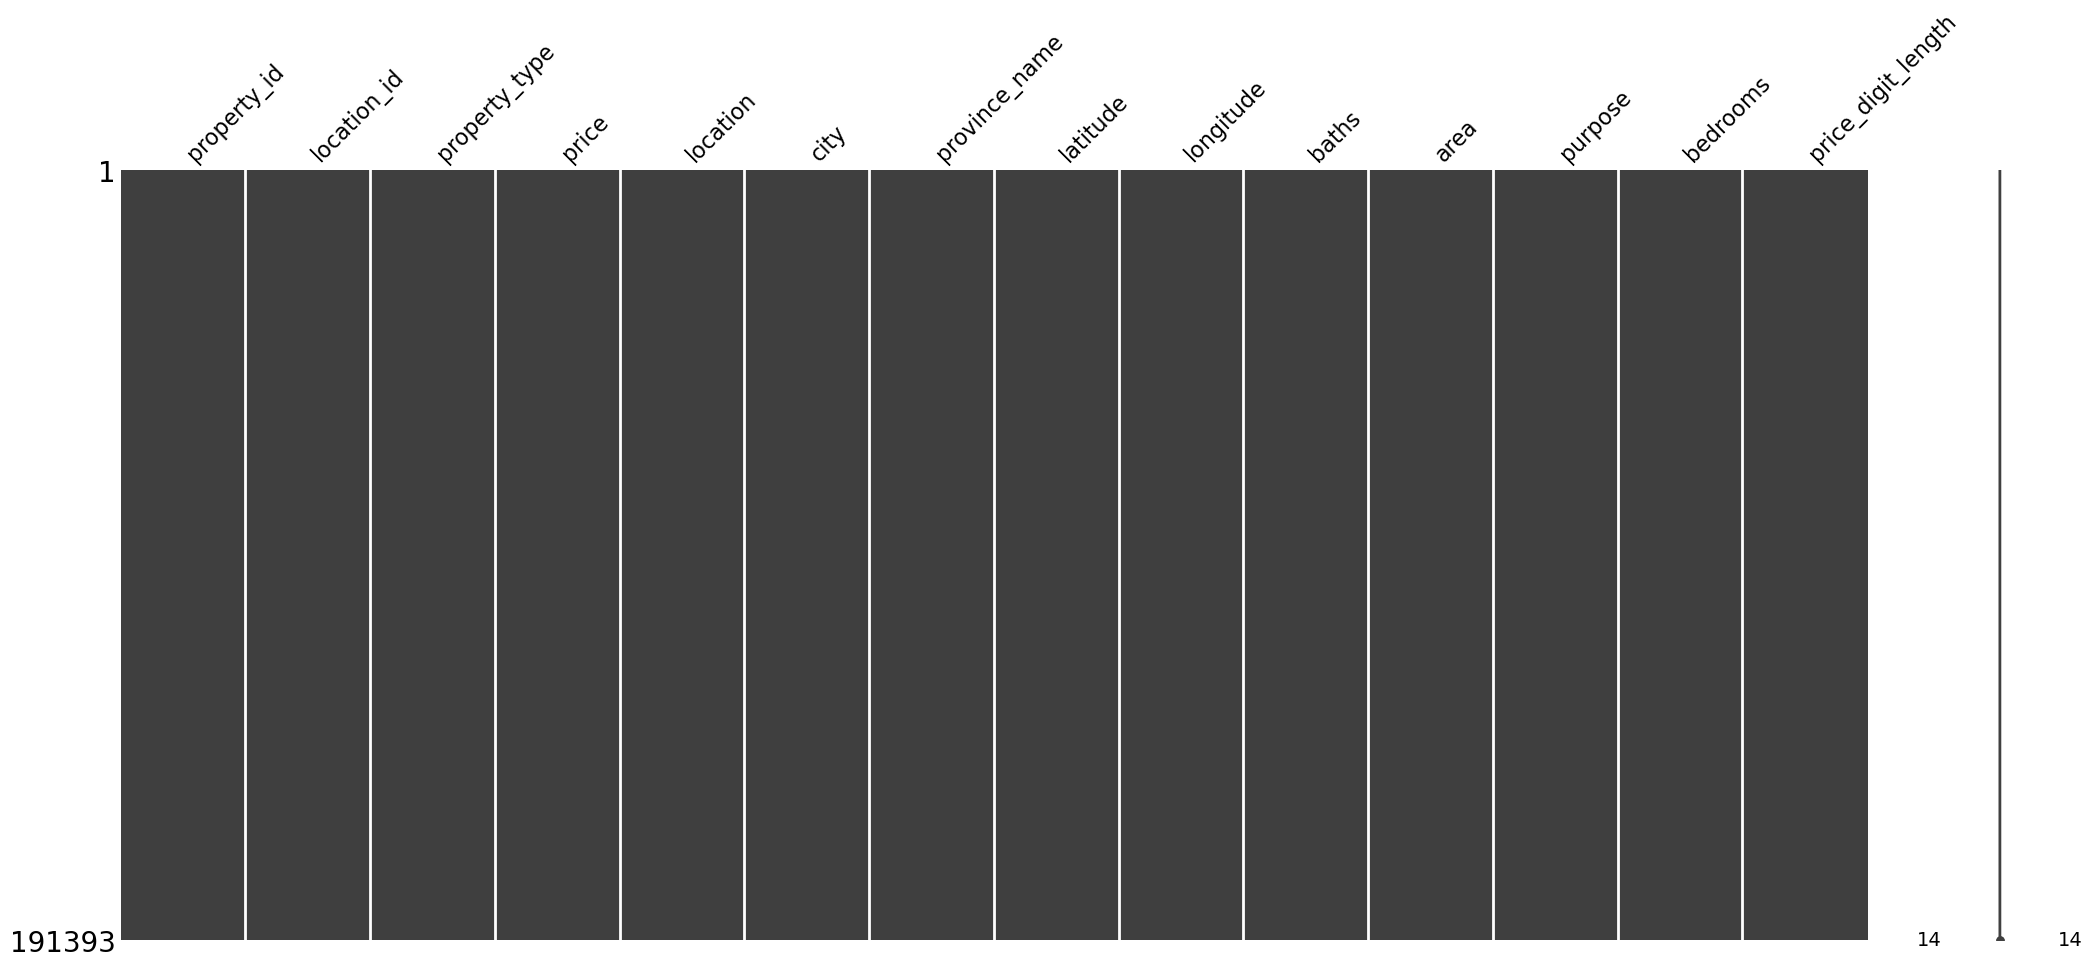

In [8]:
# Importing the libraries 
import pandas as pd 
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(df) 

In [9]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [10]:
# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display columns with missing values and their percentages
print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


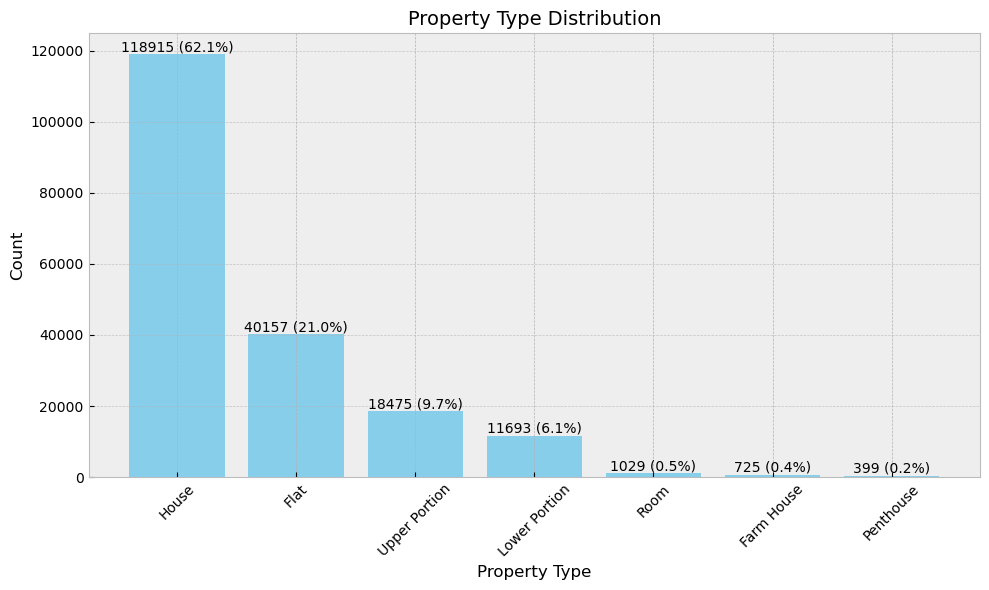

In [11]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'property_type' column
property_counts = df['property_type'].value_counts()

# Calculate percentages
property_percentages = (property_counts / property_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(property_counts.index, property_counts, color='skyblue')

# Add labels for each bar (both counts and percentages)
for bar, count, percentage in zip(bars, property_counts, property_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally on the bar
        bar.get_height(),  # Position the text just above the bar
        f"{count} ({percentage:.1f}%)",  # Label format: count (percentage)
        ha='center', va='bottom', fontsize=10
    )

# Add labels and title
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Property Type Distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better visualization

# Show the plot
plt.tight_layout()
plt.show()


Filter Rows only for House and Flat

In [12]:
# Filter the DataFrame to keep only rows containing 'House' or 'Flat' in the 'property_type' column
df = df[df['property_type'].isin(['House', 'Flat'])]

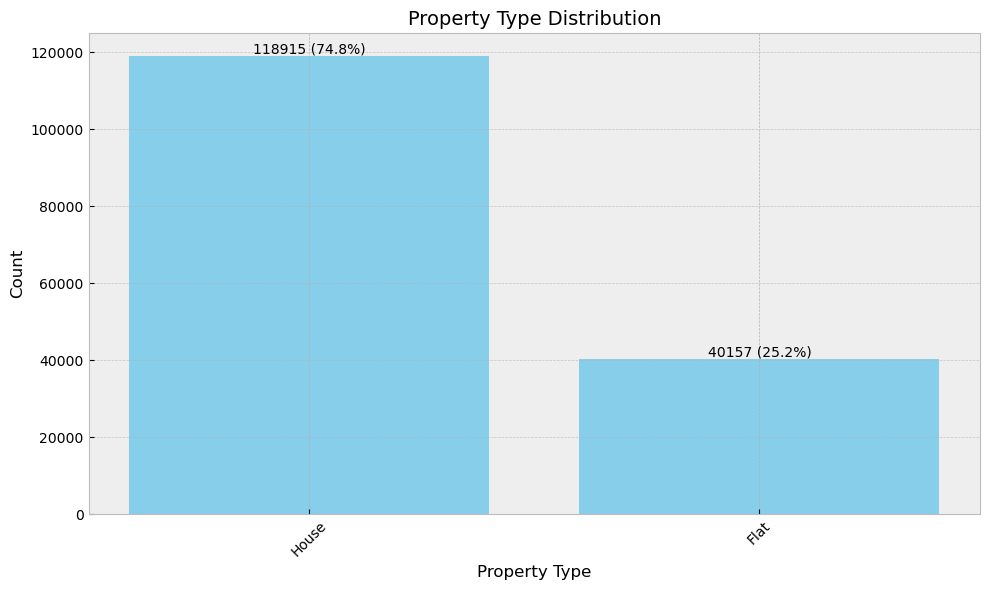

In [13]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'property_type' column
property_counts = df['property_type'].value_counts()

# Calculate percentages
property_percentages = (property_counts / property_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(property_counts.index, property_counts, color='skyblue')

# Add labels for each bar (both counts and percentages)
for bar, count, percentage in zip(bars, property_counts, property_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally on the bar
        bar.get_height(),  # Position the text just above the bar
        f"{count} ({percentage:.1f}%)",  # Label format: count (percentage)
        ha='center', va='bottom', fontsize=10
    )

# Add labels and title
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Property Type Distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better visualization

# Show the plot
plt.tight_layout()
plt.show()


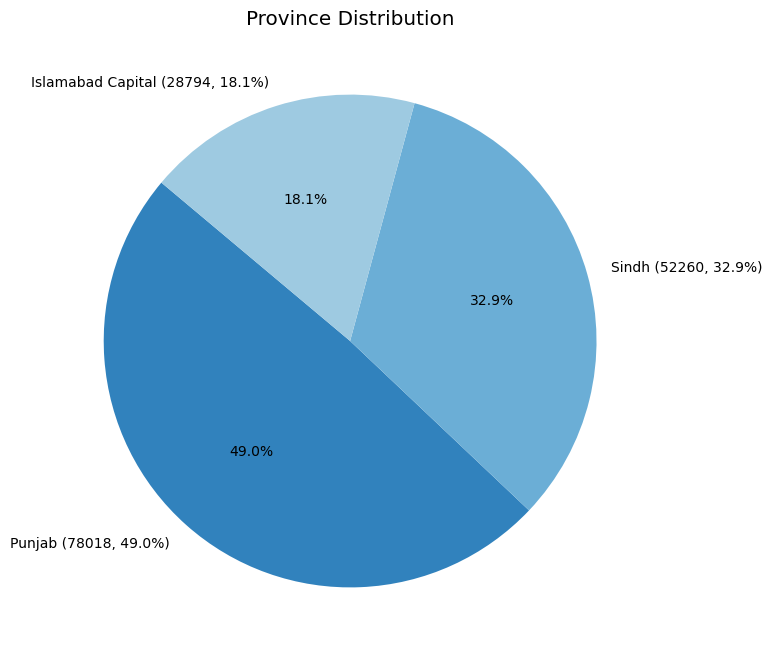

In [14]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'province_name' column
province_counts = df['province_name'].value_counts()

# Calculate percentages
province_percentages = (province_counts / province_counts.sum()) * 100

# Create labels with counts and percentages
labels = [
    f"{index} ({count}, {percentage:.1f}%)"
    for index, count, percentage in zip(province_counts.index, province_counts, province_percentages)
]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    province_counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140, 
    colors=plt.cm.tab20c.colors  # Use a different color palette for variety
)

# Add a title
plt.title('Province Distribution')

# Show the plot
plt.show()

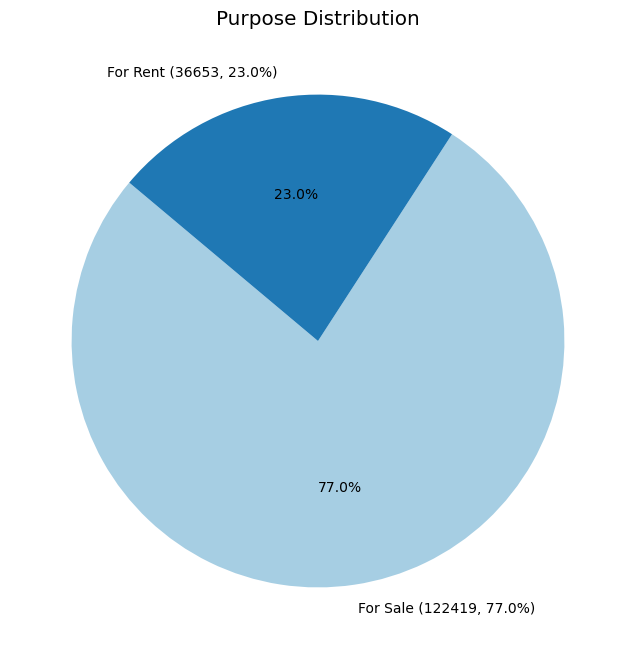

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Count occurrences of each category in the 'purpose' column
purpose_counts = df['purpose'].value_counts()

# Calculate percentages
purpose_percentages = (purpose_counts / purpose_counts.sum()) * 100

# Create labels with counts and percentages
labels = [f"{index} ({count}, {percentage:.1f}%)" for index, count, percentage in zip(purpose_counts.index, purpose_counts, purpose_percentages)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    purpose_counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140, 
    colors=plt.cm.Paired.colors
)

# Add a title
plt.title('Purpose Distribution')

# Show the plot
plt.show()

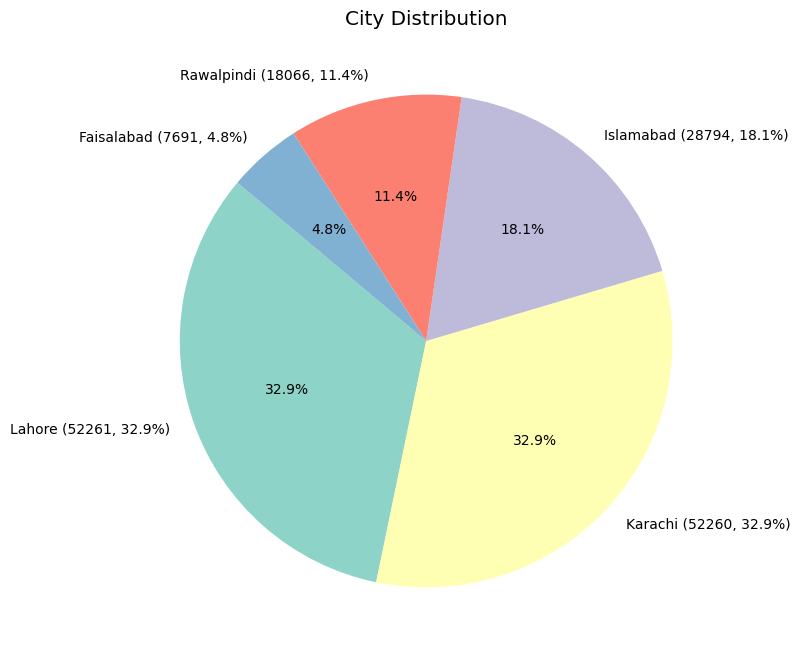

In [16]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'city' column
city_counts = df['city'].value_counts()

# Calculate percentages
city_percentages = (city_counts / city_counts.sum()) * 100

# Create labels with counts and percentages
labels = [
    f"{index} ({count}, {percentage:.1f}%)"
    for index, count, percentage in zip(city_counts.index, city_counts, city_percentages)
]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    city_counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140, 
    colors=plt.cm.Set3.colors  # Use Set3 color palette for variation
)

# Add a title
plt.title('City Distribution')

# Show the plot
plt.show()

import folium
import pandas as pd

# Create a base map centered on the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Add markers for each location
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row.get('location', ''),  # Replace 'location' with your column name if present
        tooltip=f"Lat: {row['latitude']}, Long: {row['longitude']}"
    ).add_to(m)

# Save or display the map
m.save("map.html")
m  # This will display the map in Jupyter Notebook


#filtering the data for city as 'Karachi' and property type as 'House' and Purpose is 'For sale'
df = df[(df['city'] == 'Karachi') & (df['purpose'] == 'For Sale') & (df['property_type'] == 'House')]
df = df.drop(['property_id','Unnamed: 0','property_type','city','province_name','latitude','longitude','purpose'], axis=1)
df.info()

In [17]:
len(df['location'].unique())

1496

# Deleting rows where location data has insufficient records, so as to improve model prection performance
df = df[df['location'].isin(df['location'].value_counts()[df['location'].value_counts() >= 25].index)]
#df.to_csv('locations.csv')
df.shape

In [18]:
len(df['location'].value_counts())

1496

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159072 entries, 0 to 191391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   property_id         159072 non-null  int64  
 1   location_id         159072 non-null  int64  
 2   property_type       159072 non-null  object 
 3   price               159072 non-null  int64  
 4   location            159072 non-null  object 
 5   city                159072 non-null  object 
 6   province_name       159072 non-null  object 
 7   latitude            159072 non-null  float64
 8   longitude           159072 non-null  float64
 9   baths               159072 non-null  int64  
 10  area                159072 non-null  object 
 11  purpose             159072 non-null  object 
 12  bedrooms            159072 non-null  int64  
 13  price_digit_length  159072 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 18.2+ MB


#converting location column to from categorical to numerical
locations = df['location'].unique()
locations_dict = {locations[i]: i  for i in range(len(locations))}

df.loc[:, 'location'] = df['location'].replace(locations_dict)
df.location.unique()
df['location']=df['location'].astype(int)
df.info()

In [20]:
#calculating the area in square feet, and convert it from string to numerical
df = df.copy()
df['area_num'] = df['area'].str.split(' ').str[0]
df['area_str'] = df['area'].str.split(' ').str[1]
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,price_digit_length,area_num,area_str
0,347795,8,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,9,6,Kanal
1,482892,48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,8,1,Kanal
2,555962,75,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,7,9,Marla
3,562843,3821,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,9,1,Kanal
4,686990,3522,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,8,11,Marla


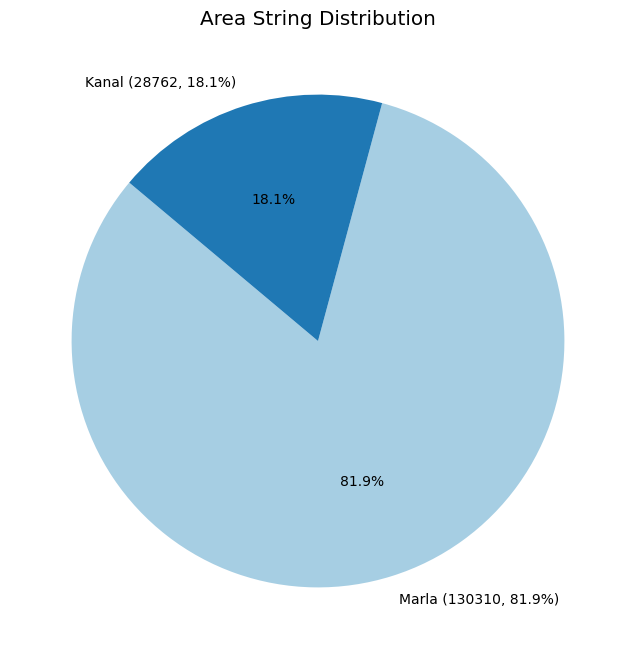

In [21]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'area_str' column
area_counts = df['area_str'].value_counts()

# Calculate percentages
area_percentages = (area_counts / area_counts.sum()) * 100

# Create labels with counts and percentages
labels = [
    f"{index} ({count}, {percentage:.1f}%)"
    for index, count, percentage in zip(area_counts.index, area_counts, area_percentages)
]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    area_counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140, 
    colors=plt.cm.Paired.colors  # Use a different color palette for variety
)

# Add a title
plt.title('Area String Distribution')

# Show the plot
plt.show()

In [22]:
df.area_str.unique()

array(['Kanal', 'Marla'], dtype=object)

In [23]:
df['area_num'] = df['area_num'].str.replace(',', '')
df['area_num'].unique()

array(['6', '1', '9', '11', '8', '1.6', '7.5', '1.2', '5', '10', '18',
       '12', '3', '6.5', '2.5', '2', '1.1', '4.7', '9.7', '17', '4', '14',
       '5.5', '8.2', '7', '10.1', '4.4', '15', '1.7', '13', '1.5', '1.4',
       '1.3', '4.3', '2.2', '16', '8.9', '3.2', '9.6', '9.8', '10.2',
       '11.4', '13.1', '4.8', '7.6', '5.4', '13.4', '13.2', '5.2', '6.1',
       '9.1', '4.2', '10.6', '6.7', '11.2', '15.8', '12.2', '10.3', '3.7',
       '17.5', '5.1', '8.8', '3.4', '2.9', '5.8', '3.6', '18.2', '11.8',
       '6.2', '3.3', '4.9', '18.4', '7.3', '11.7', '5.6', '8.1', '10.7',
       '2.8', '1.8', '12.5', '1.9', '7.1', '7.8', '4.5', '3.1', '8.4',
       '17.8', '5.3', '2.1', '10.9', '3.8', '6.9', '6.6', '11.1', '4.1',
       '16.4', '9.3', '4.6', '2.7', '11.5', '0.9', '14.7', '14.2', '13.3',
       '2.4', '11.6', '3.5', '15.2', '10.8', '6.4', '5.7', '5.9', '8.7',
       '19.1', '6.3', '13.8', '15.3', '2.6', '8.3', '7.9', '12.4', '19',
       '15.9', '3.9', '17.3', '12.6', '7.2', '8.6'

In [24]:
# Convert 'area_num' from object (string) to float
df['area_num'] = pd.to_numeric(df['area_num'], errors='coerce')
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,price_digit_length,area_num,area_str
0,347795,8,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,9,6.0,Kanal
1,482892,48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,8,1.0,Kanal
2,555962,75,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,7,9.0,Marla
3,562843,3821,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,9,1.0,Kanal
4,686990,3522,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,8,11.0,Marla


In [25]:
# Define a function to convert the area based on the unit
def convert_to_marlas(row):
    if row['area_str'] == 'Kanal':
        return row['area_num'] * 20  # 1 Kanal = 20 Marlas
    elif row['area_str'] == 'Marla':
        return row['area_num']  # No conversion needed if it's already in Marlas
    else:
        return None  # Handle cases where the unit is neither Kanal nor Marla

# Apply the function to create the new column 'Area' in Marlas
df['Area'] = df.apply(convert_to_marlas, axis=1)
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,price_digit_length,area_num,area_str,Area
0,347795,8,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,9,6.0,Kanal,120.0
1,482892,48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,8,1.0,Kanal,20.0
2,555962,75,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,7,9.0,Marla,9.0
3,562843,3821,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,9,1.0,Kanal,20.0
4,686990,3522,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,8,11.0,Marla,11.0


In [26]:
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,price_digit_length,area_num,area_str,Area
0,347795,8,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,9,6.0,Kanal,120.0
1,482892,48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,8,1.0,Kanal,20.0
2,555962,75,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,7,9.0,Marla,9.0
3,562843,3821,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,9,1.0,Kanal,20.0
4,686990,3522,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,8,11.0,Marla,11.0


In [27]:
# Drop the columns 'area', 'area_num', and 'area_str'
df = df.drop(columns=['area', 'area_num', 'area_str','property_id','location_id','latitude','longitude'])
df.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,price_digit_length,Area
0,House,220000000,Model Town,Lahore,Punjab,0,For Sale,0,9,120.0
1,House,40000000,Multan Road,Lahore,Punjab,5,For Sale,5,8,20.0
2,House,9500000,Eden,Lahore,Punjab,0,For Sale,3,7,9.0
3,House,125000000,Gulberg,Lahore,Punjab,7,For Sale,8,9,20.0
4,House,21000000,Allama Iqbal Town,Lahore,Punjab,5,For Sale,6,8,11.0


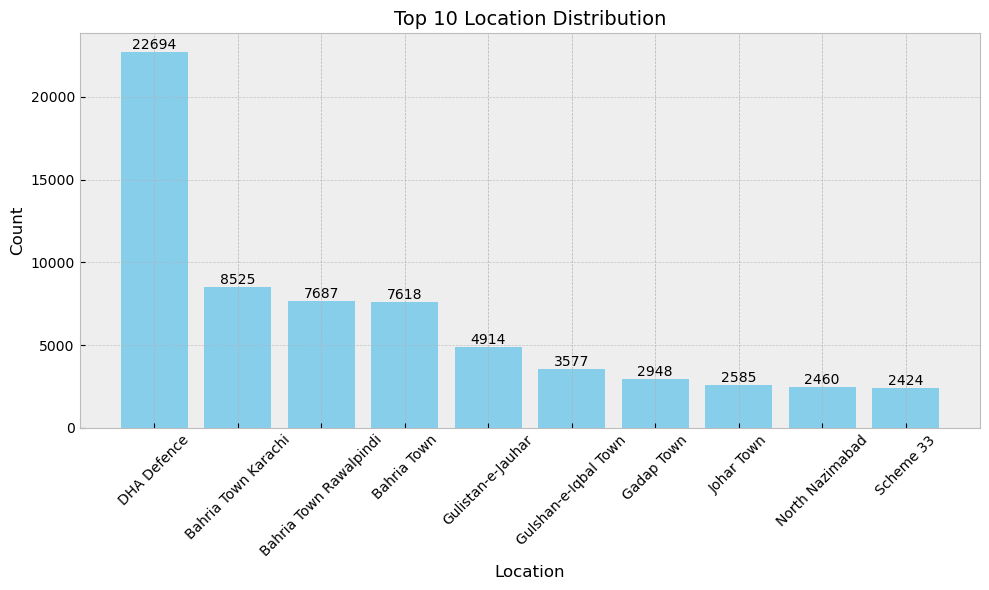

In [28]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'location' column
location_counts = df['location'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(location_counts.index, location_counts, color='skyblue')

# Add labels for each bar (count)
for bar, count in zip(bars, location_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally on the bar
        bar.get_height(),  # Position the text just above the bar
        str(count),  # Display the count above each bar
        ha='center', va='bottom', fontsize=10
    )

# Add labels and title
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 10 Location Distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better visualization

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Drop the columns 'area', 'area_num', and 'area_str'
df = df.drop(columns=["location"])
df.head()

,property_type,price,city,province_name,baths,purpose,bedrooms,price_digit_length,Area
0,House,220000000,Lahore,Punjab,0,For Sale,0,9,120.0
1,House,40000000,Lahore,Punjab,5,For Sale,5,8,20.0
2,House,9500000,Lahore,Punjab,0,For Sale,3,7,9.0
3,House,125000000,Lahore,Punjab,7,For Sale,8,9,20.0
4,House,21000000,Lahore,Punjab,5,For Sale,6,8,11.0


In [30]:
df.head()

,property_type,price,city,province_name,baths,purpose,bedrooms,price_digit_length,Area
0,House,220000000,Lahore,Punjab,0,For Sale,0,9,120.0
1,House,40000000,Lahore,Punjab,5,For Sale,5,8,20.0
2,House,9500000,Lahore,Punjab,0,For Sale,3,7,9.0
3,House,125000000,Lahore,Punjab,7,For Sale,8,9,20.0
4,House,21000000,Lahore,Punjab,5,For Sale,6,8,11.0


In [31]:
df.shape 

(159072, 9)

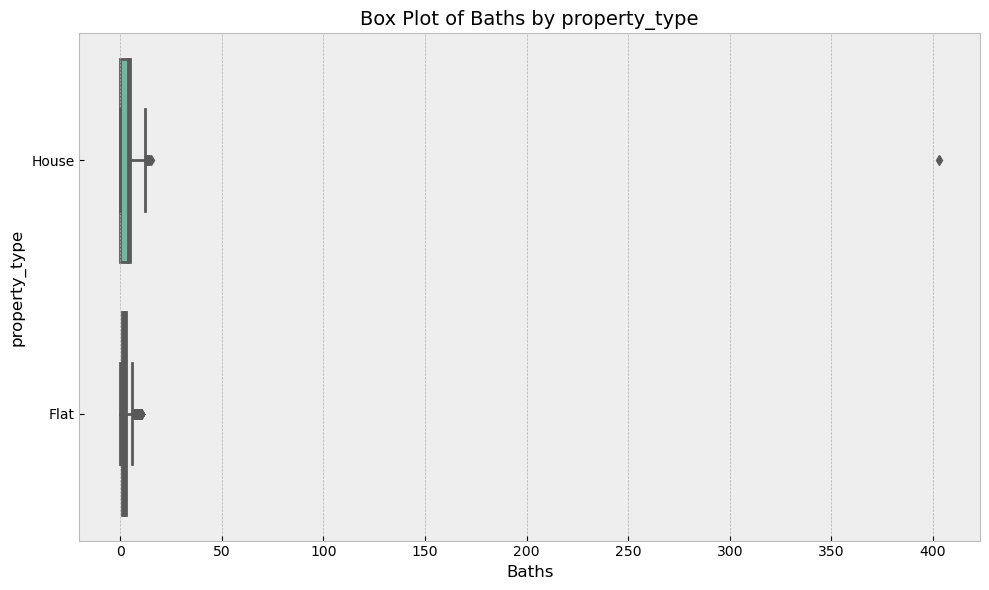

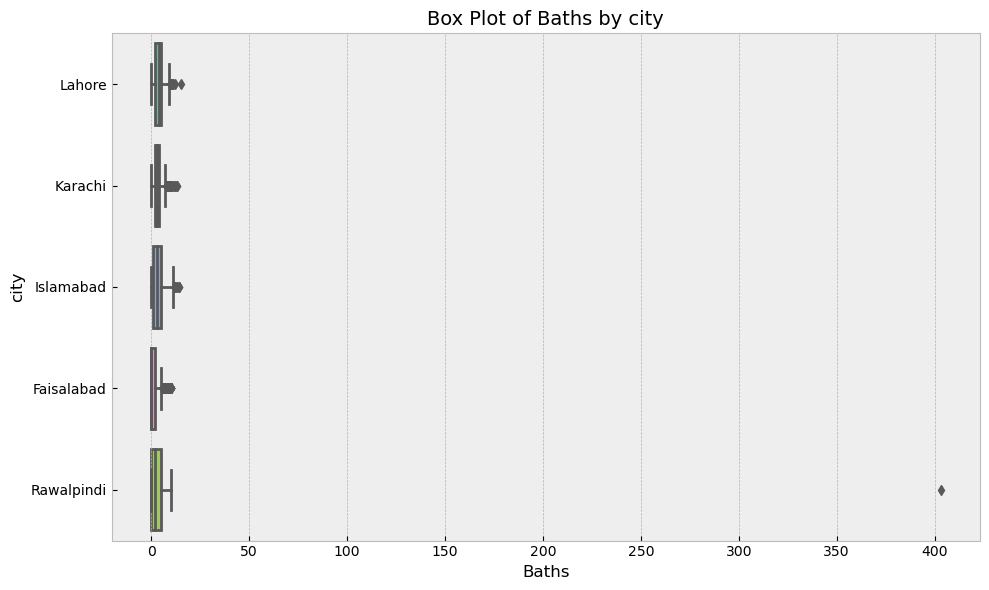

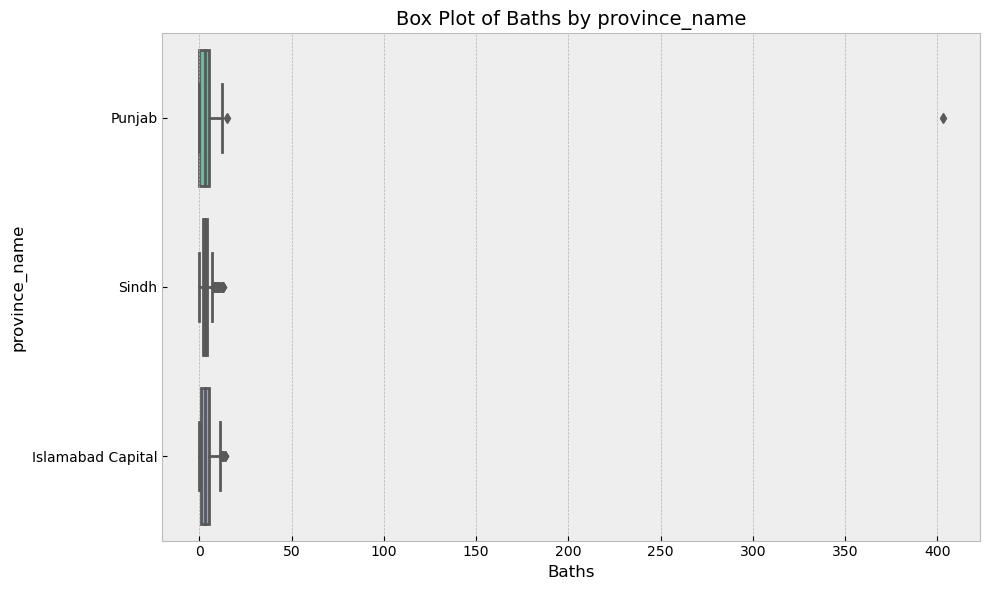

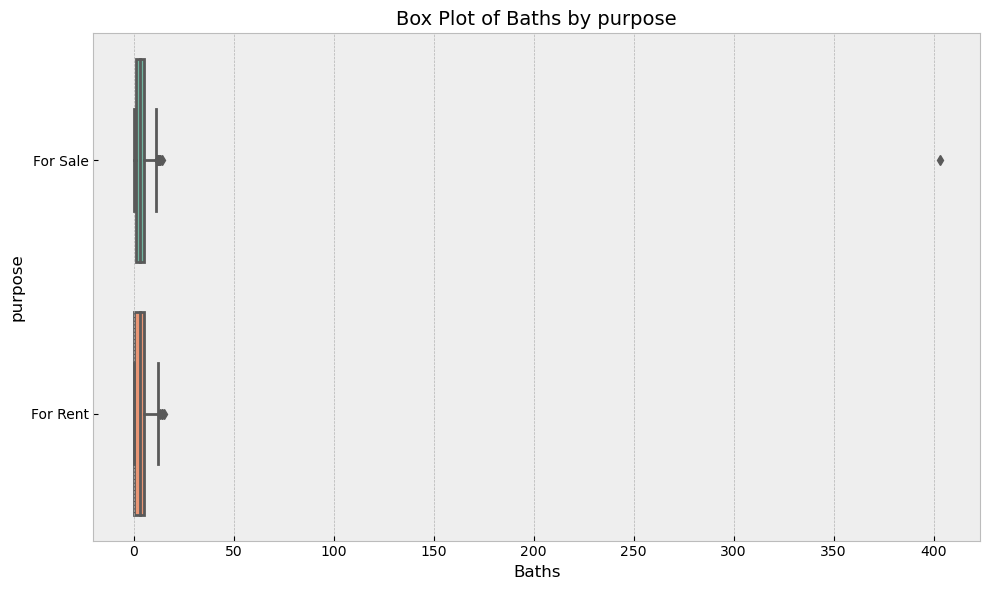

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(data=df, y=cat_col, x='baths', palette='Set2')  # Flip x and y for horizontal orientation
    plt.title(f'Box Plot of Baths by {cat_col}', fontsize=14)
    plt.xlabel('Baths', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
    plt.show()

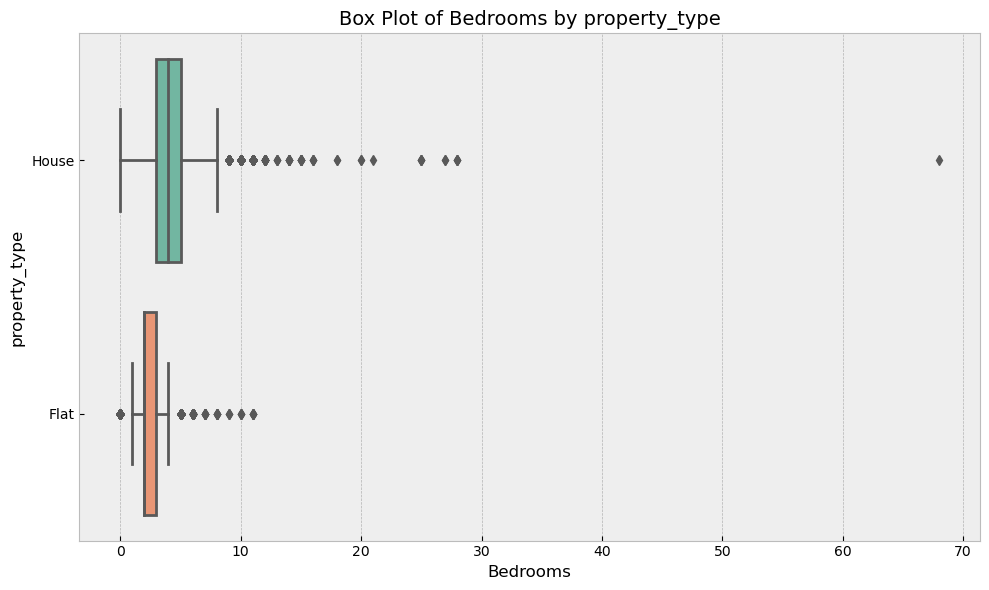

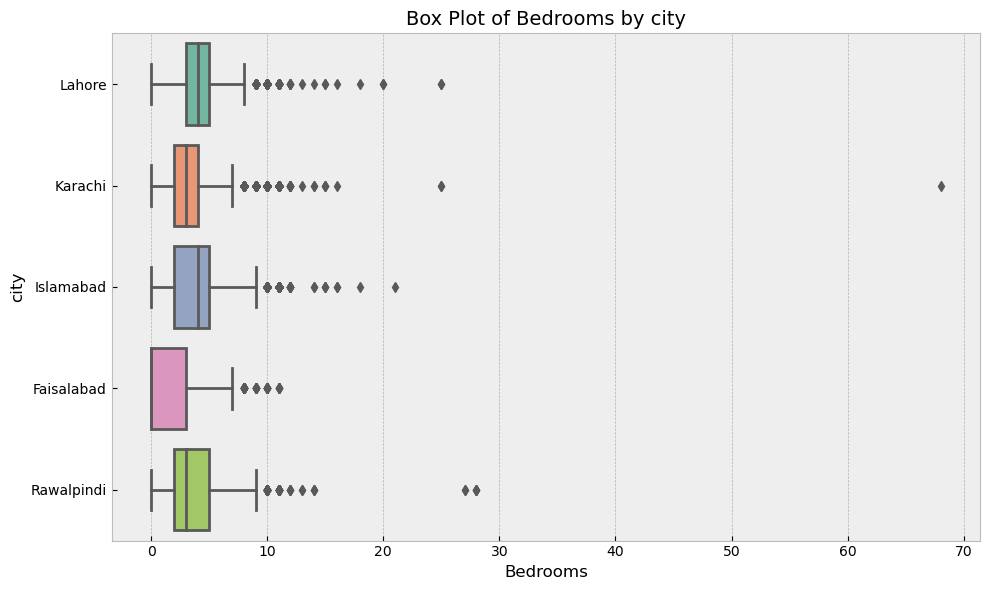

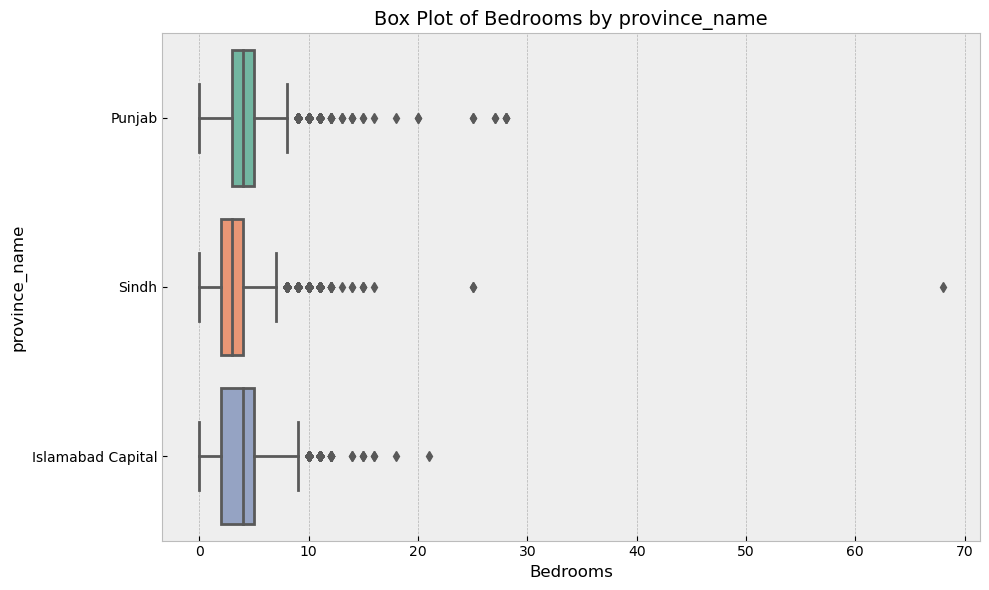

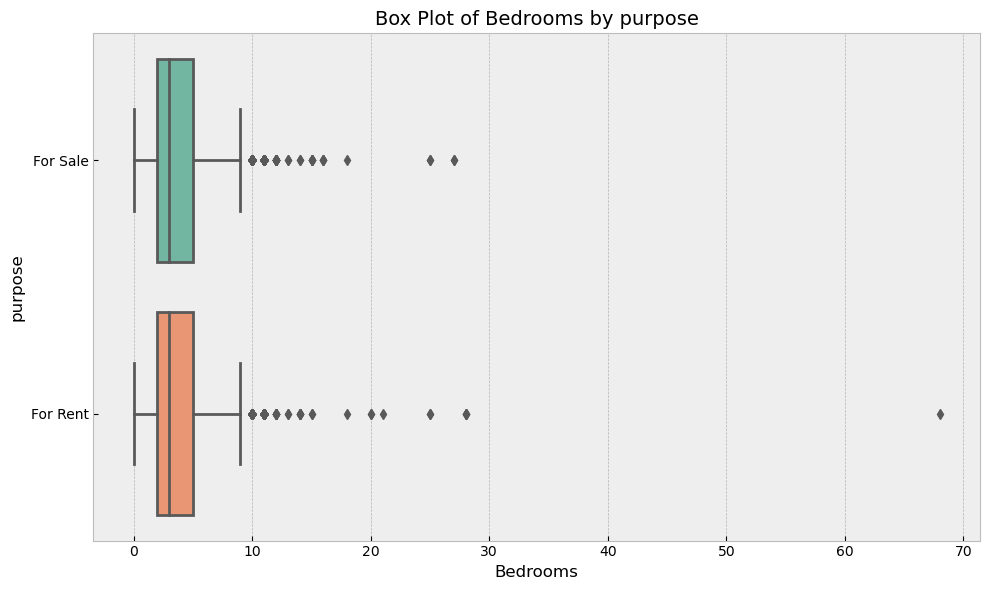

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(data=df, y=cat_col, x='bedrooms', palette='Set2')  # Flip x and y for horizontal orientation
    plt.title(f'Box Plot of Bedrooms by {cat_col}', fontsize=14)
    plt.xlabel('Bedrooms', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
    plt.show()

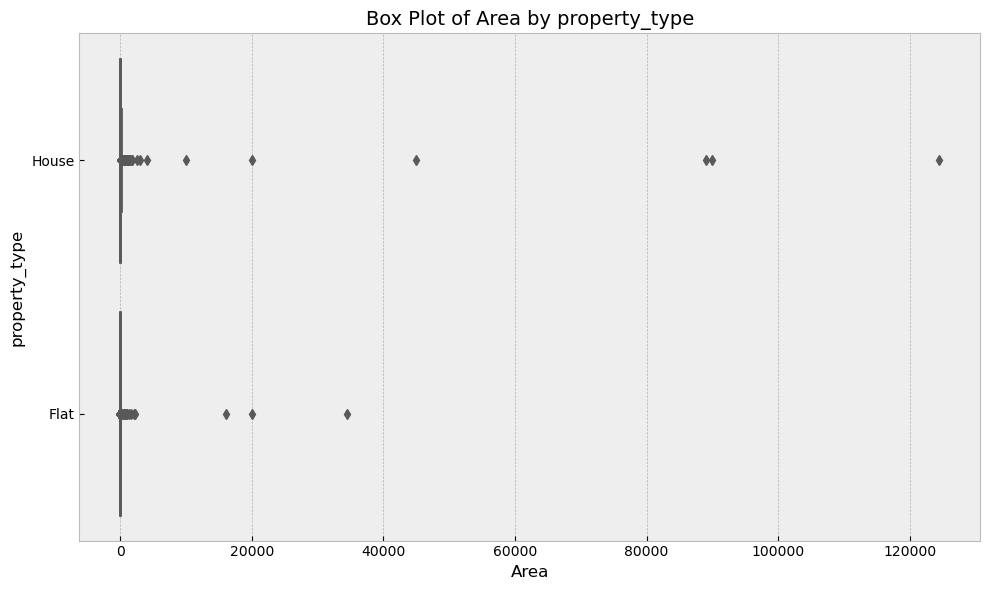

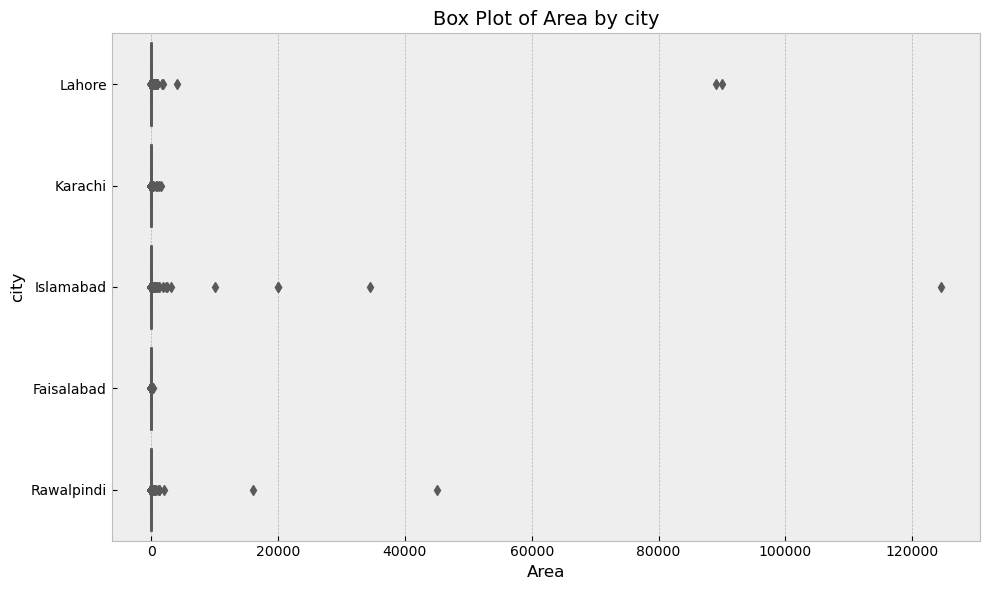

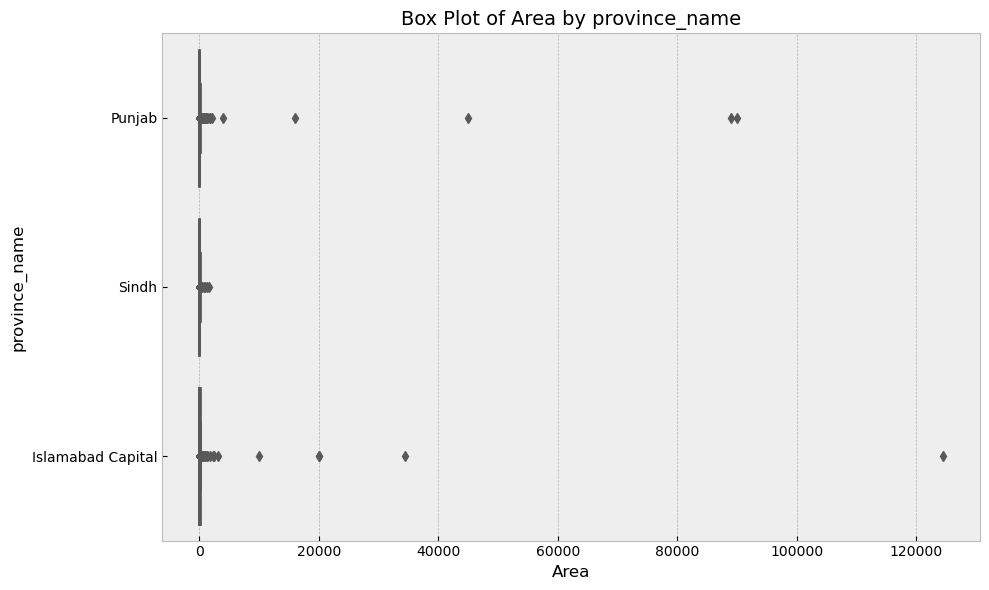

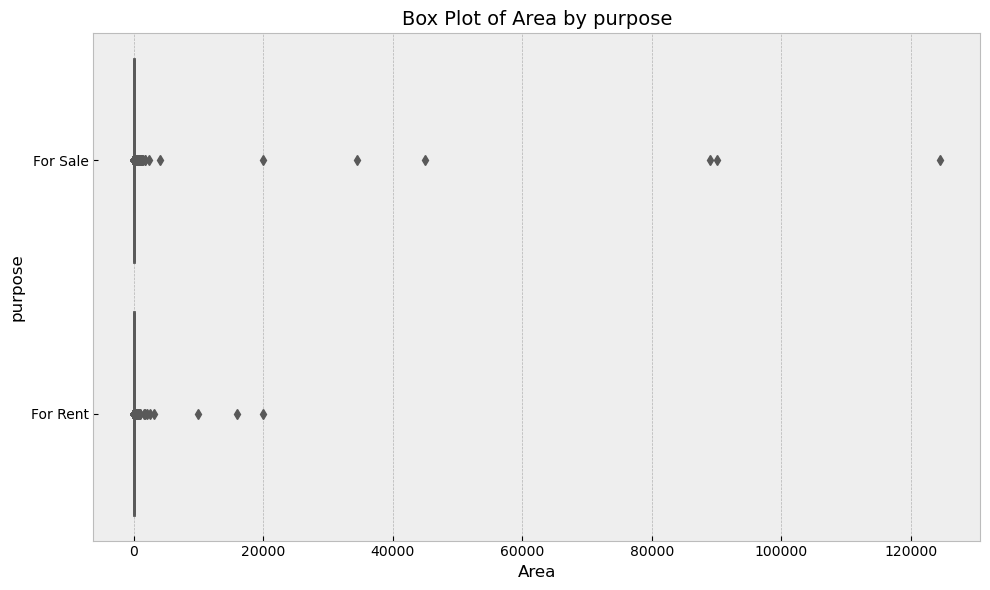

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(data=df, y=cat_col, x='Area', palette='Set2')  # Flip x and y for horizontal orientation
    plt.title(f'Box Plot of Area by {cat_col}', fontsize=14)
    plt.xlabel('Area', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
    plt.show()

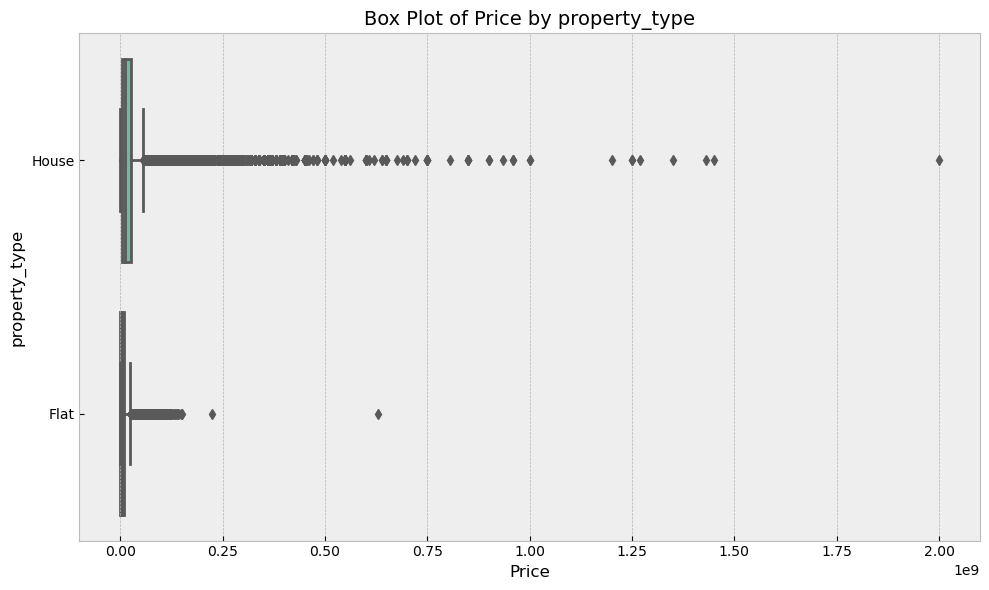

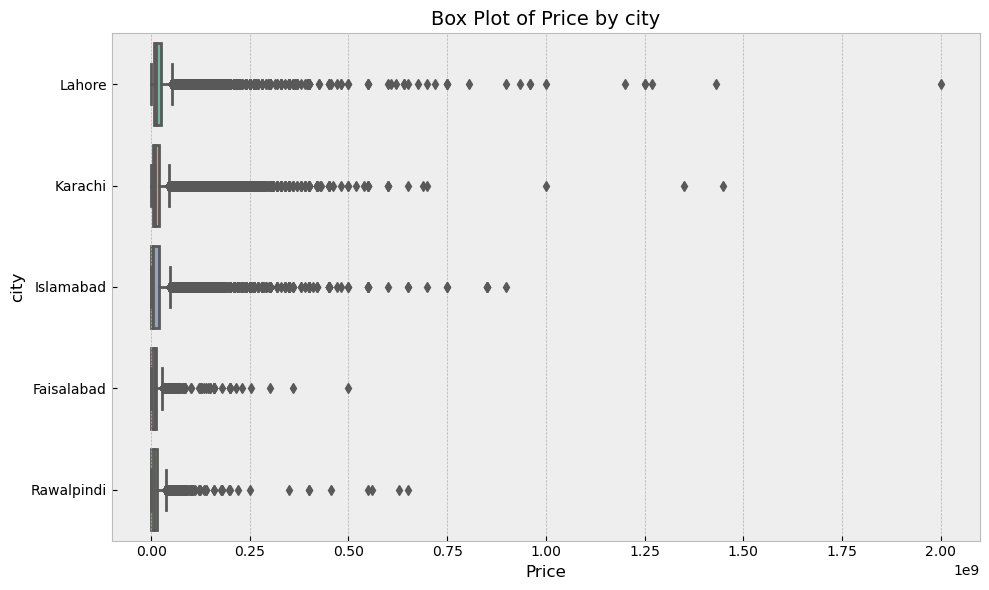

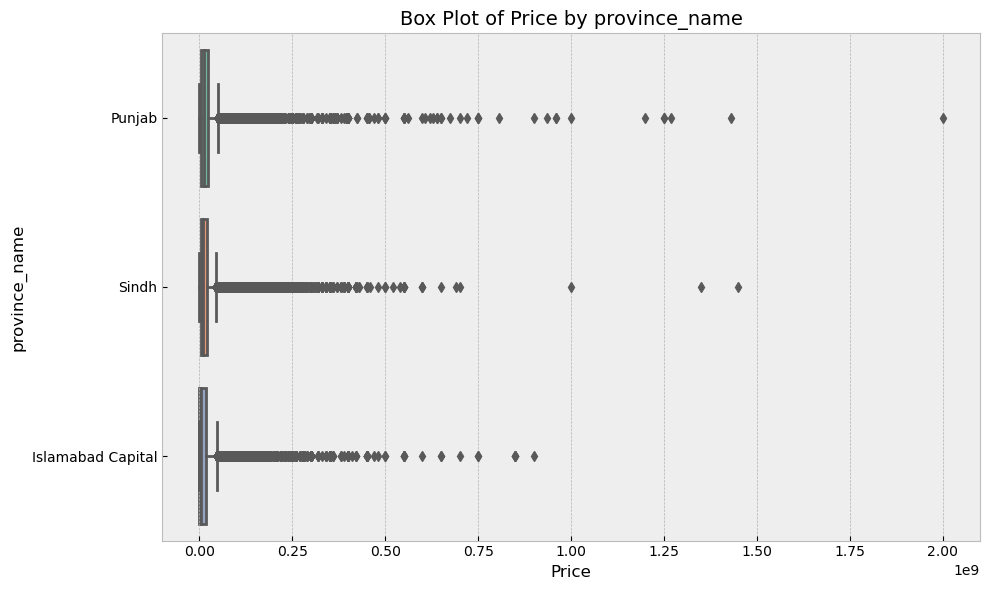

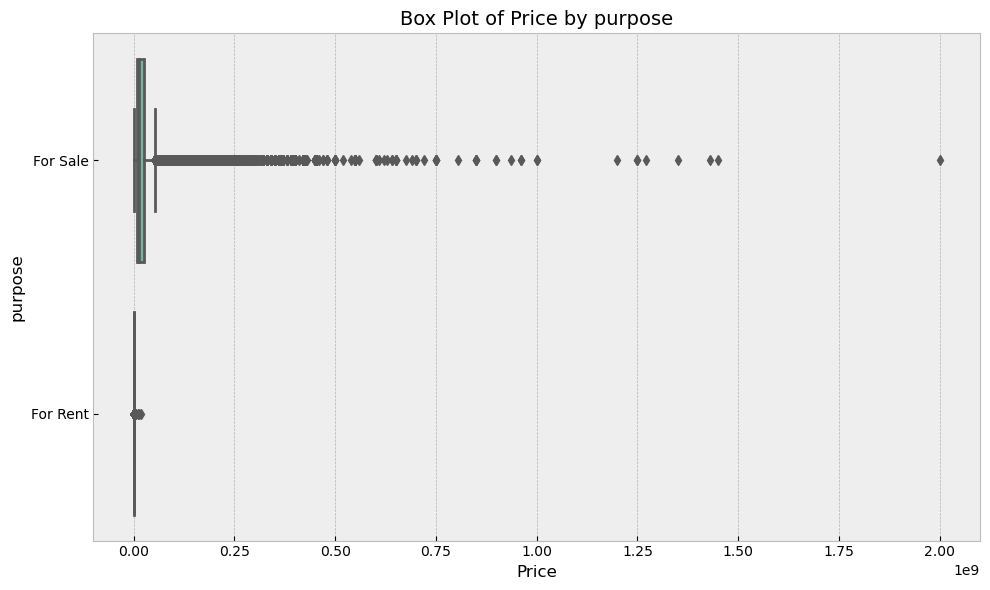

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(data=df, y=cat_col, x='price', palette='Set2')  # Flip x and y for horizontal orientation
    plt.title(f'Box Plot of Price by {cat_col}', fontsize=14)
    plt.xlabel('Price', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
    plt.show()

### Removing Outliers values from the data

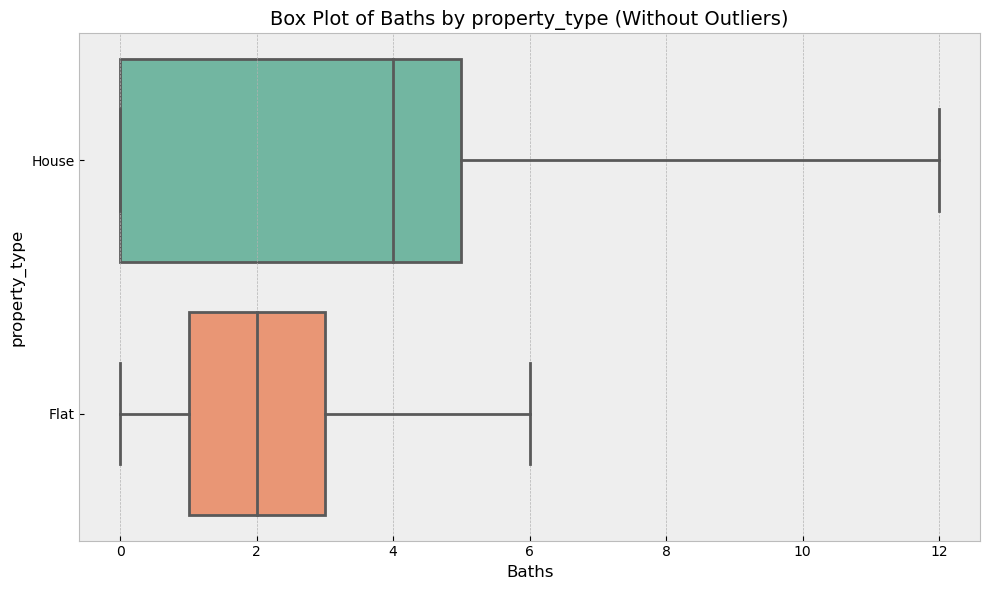

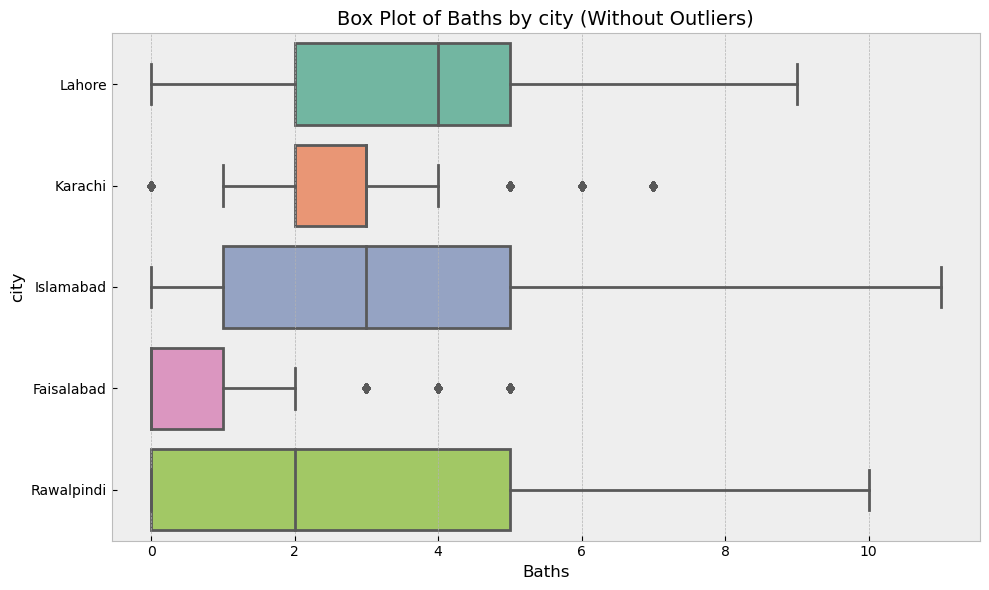

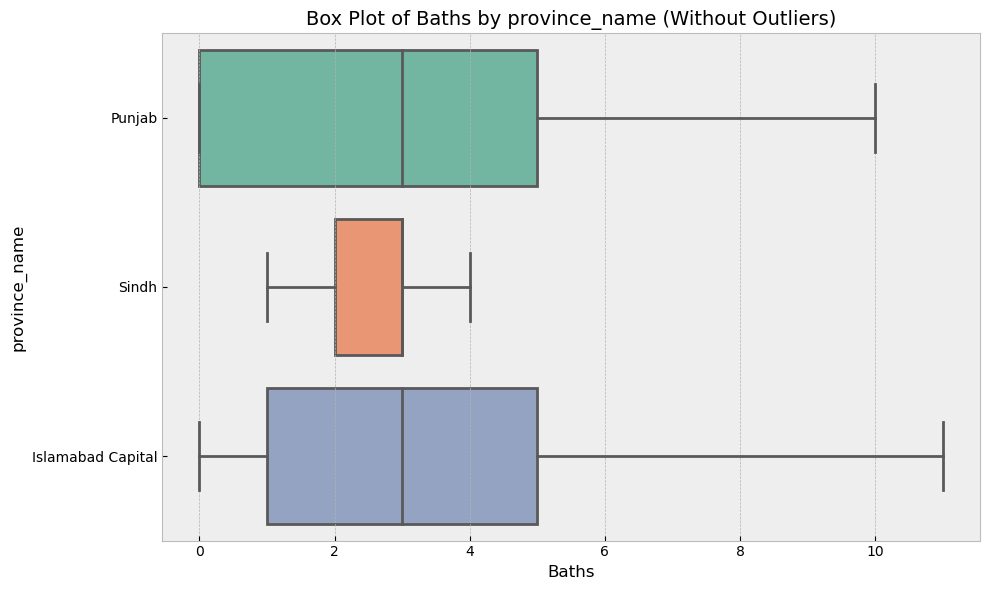

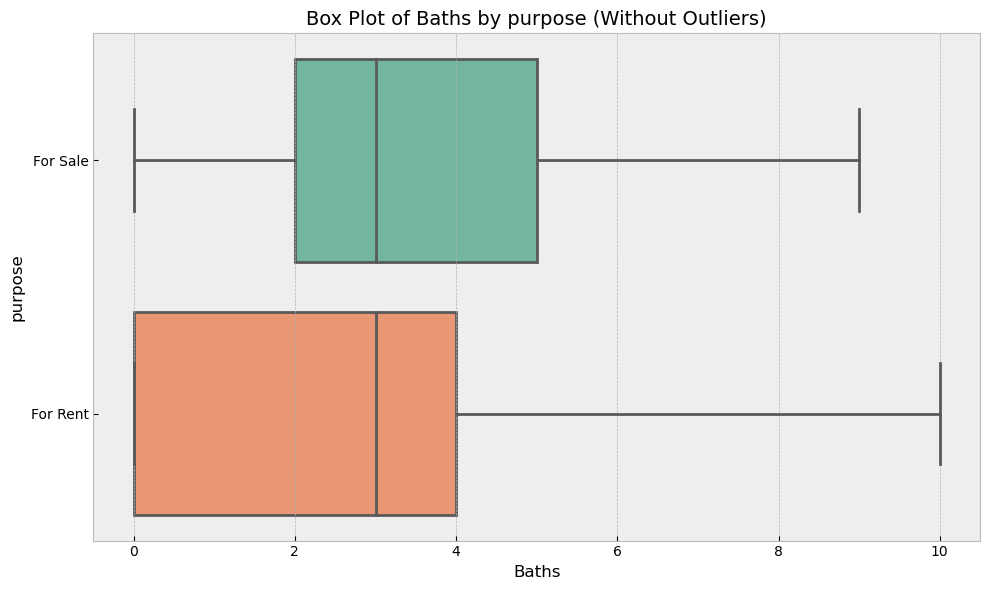

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Function to remove outliers based on IQR
def remove_outliers(df, group_col, value_col):
    filtered_df = pd.DataFrame()
    for category in df[group_col].unique():
        group_data = df[df[group_col] == category]
        Q1 = group_data[value_col].quantile(0.25)  # First quartile
        Q3 = group_data[value_col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        group_filtered = group_data[(group_data[value_col] >= lower_bound) & (group_data[value_col] <= upper_bound)]
        filtered_df = pd.concat([filtered_df, group_filtered], axis=0)
    return filtered_df

# Loop through each categorical column
for cat_col in categorical_columns:
    # Remove outliers for the 'baths' column based on the current category
    df = remove_outliers(df, group_col=cat_col, value_col='baths')  # Overwrite df with filtered data
    
    # Create horizontal box plot
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(data=df, y=cat_col, x='baths', palette='Set2')  # Horizontal orientation
    plt.title(f'Box Plot of Baths by {cat_col} (Without Outliers)', fontsize=14)
    plt.xlabel('Baths', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
    plt.show()

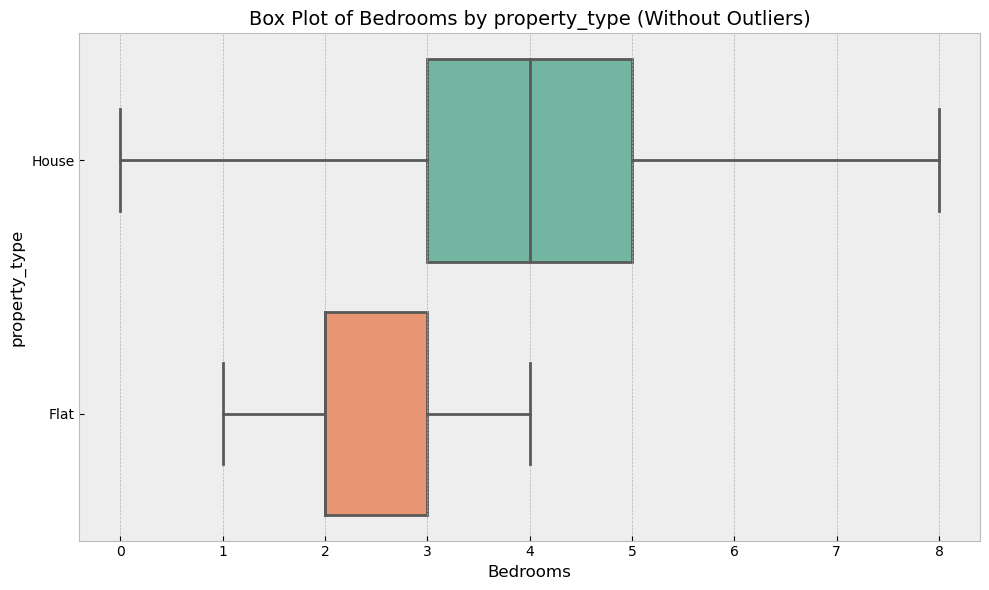

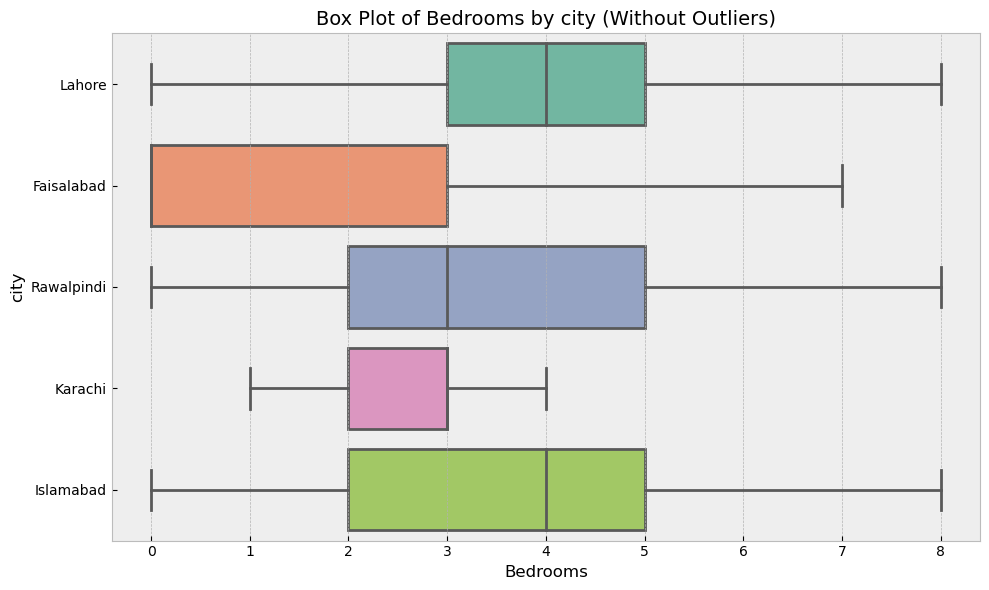

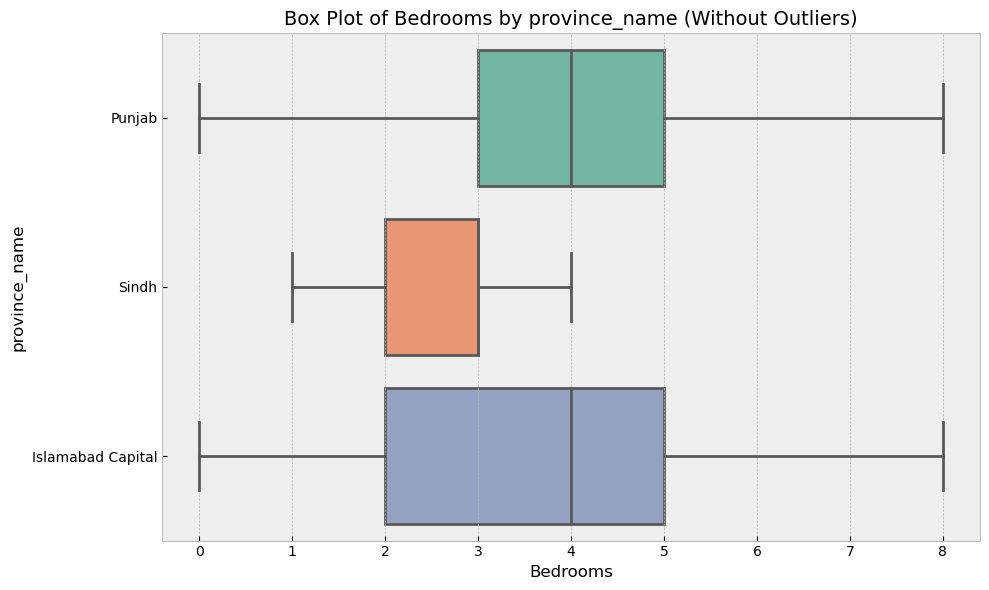

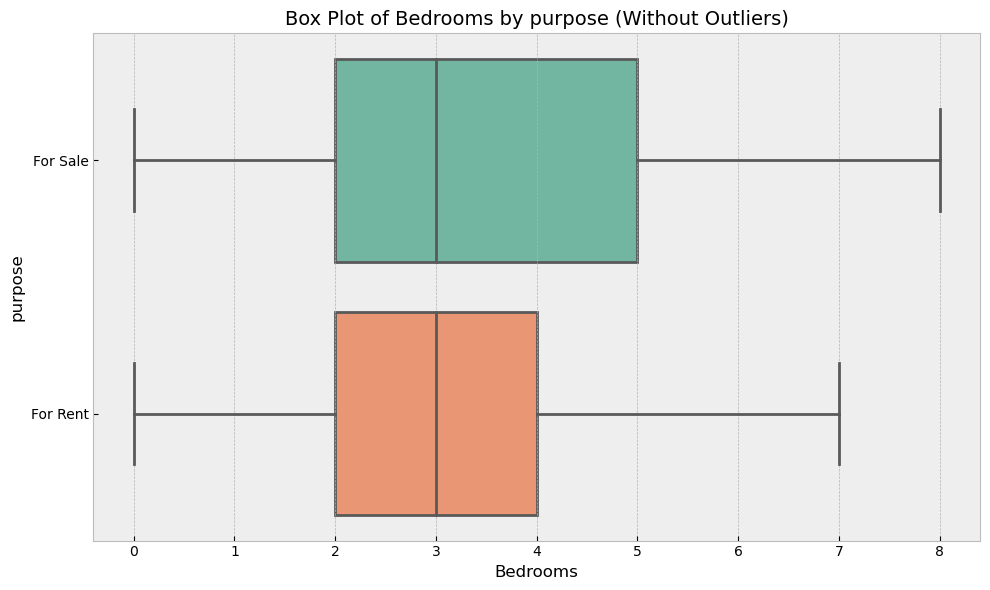

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Function to remove outliers based on IQR
def remove_outliers(df, group_col, value_col):
    filtered_df = pd.DataFrame()
    for category in df[group_col].unique():
        group_data = df[df[group_col] == category]
        Q1 = group_data[value_col].quantile(0.25)  # First quartile
        Q3 = group_data[value_col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        group_filtered = group_data[(group_data[value_col] >= lower_bound) & (group_data[value_col] <= upper_bound)]
        filtered_df = pd.concat([filtered_df, group_filtered], axis=0)
    return filtered_df

# Loop through each categorical column
for cat_col in categorical_columns:
    # Remove outliers for the 'bedrooms' column based on the current category
    df = remove_outliers(df, group_col=cat_col, value_col='bedrooms')  # Overwrite df with filtered data
    
    # Create horizontal box plot
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(data=df, y=cat_col, x='bedrooms', palette='Set2')  # Horizontal orientation
    plt.title(f'Box Plot of Bedrooms by {cat_col} (Without Outliers)', fontsize=14)
    plt.xlabel('Bedrooms', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
    plt.show()

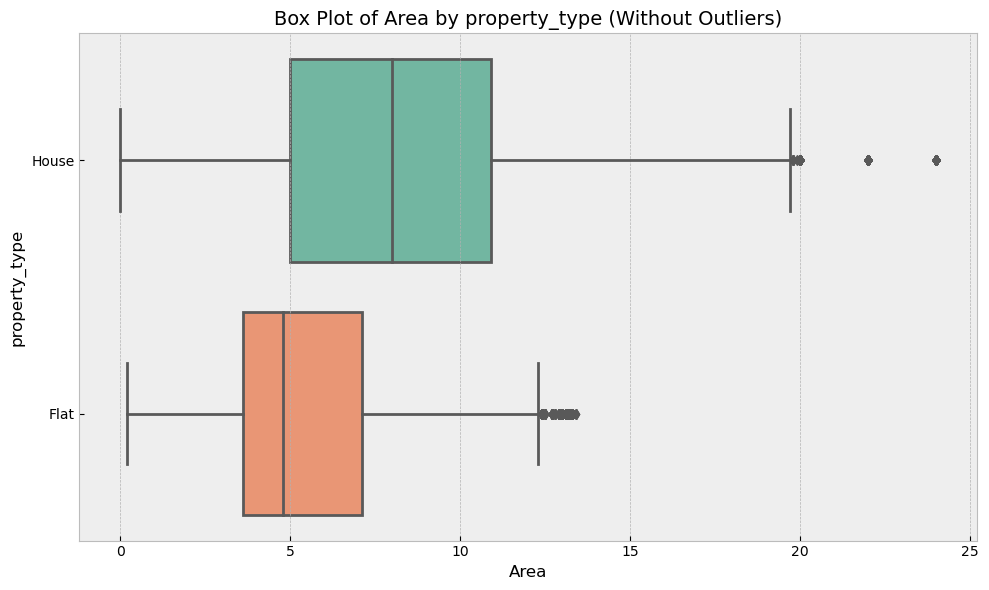

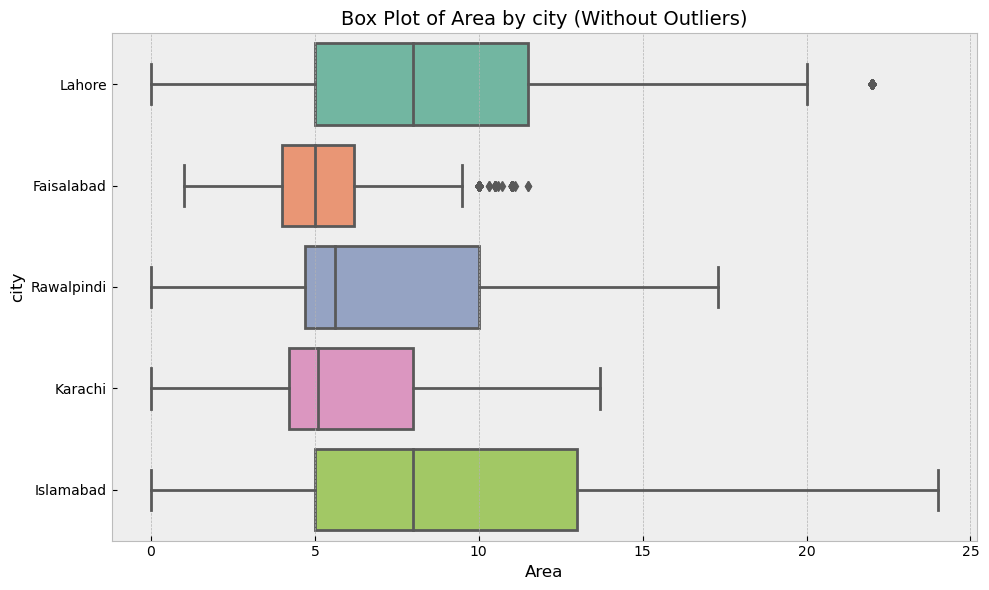

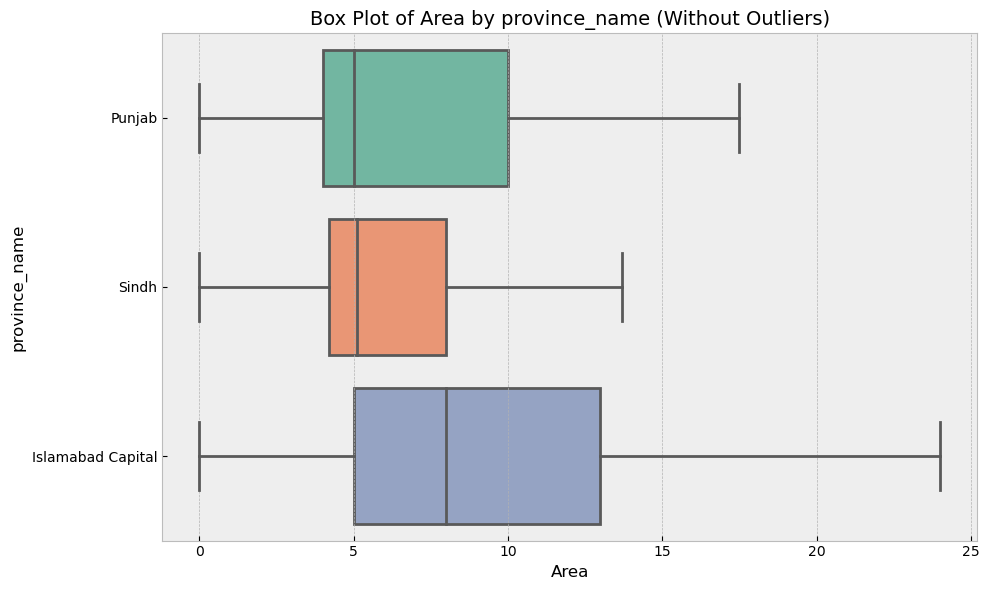

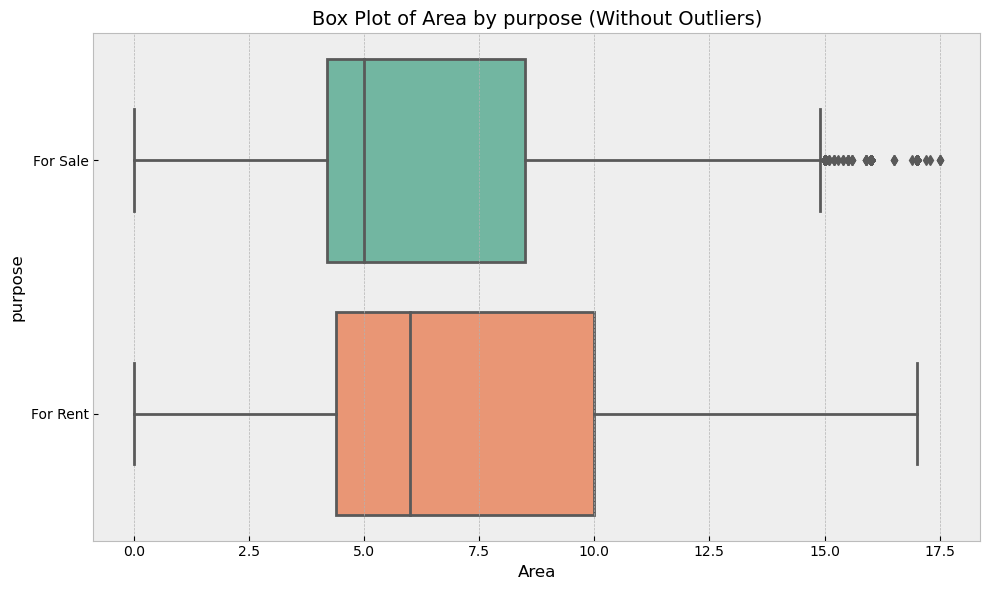

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Function to remove outliers based on IQR
def remove_outliers(df, group_col, value_col):
    filtered_df = pd.DataFrame()
    for category in df[group_col].unique():
        group_data = df[df[group_col] == category]
        Q1 = group_data[value_col].quantile(0.25)  # First quartile
        Q3 = group_data[value_col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        group_filtered = group_data[(group_data[value_col] >= lower_bound) & (group_data[value_col] <= upper_bound)]
        filtered_df = pd.concat([filtered_df, group_filtered], axis=0)
    return filtered_df

# Loop through each categorical column
for cat_col in categorical_columns:
    # Remove outliers for the 'Area' column based on the current category
    df = remove_outliers(df, group_col=cat_col, value_col='Area')  # Overwrite df with filtered data
    
    # Create horizontal box plot
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(data=df, y=cat_col, x='Area', palette='Set2')  # Horizontal orientation
    plt.title(f'Box Plot of Area by {cat_col} (Without Outliers)', fontsize=14)
    plt.xlabel('Area', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
    plt.show()

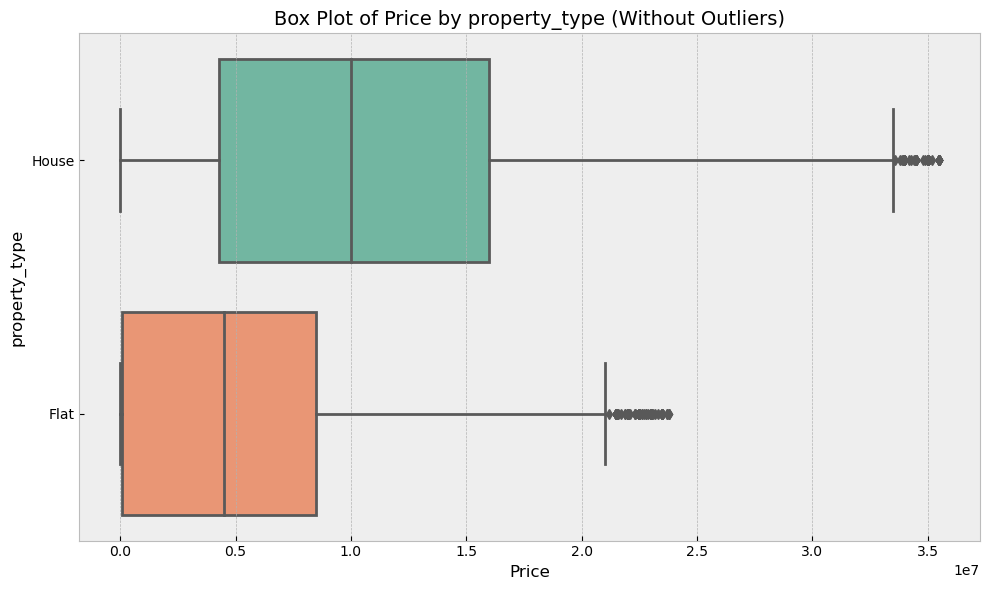

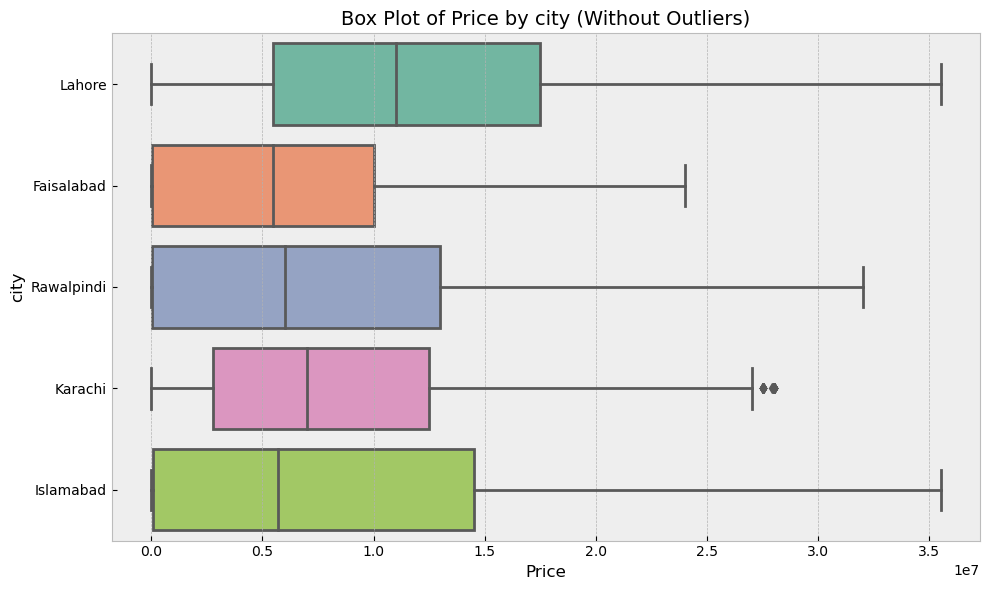

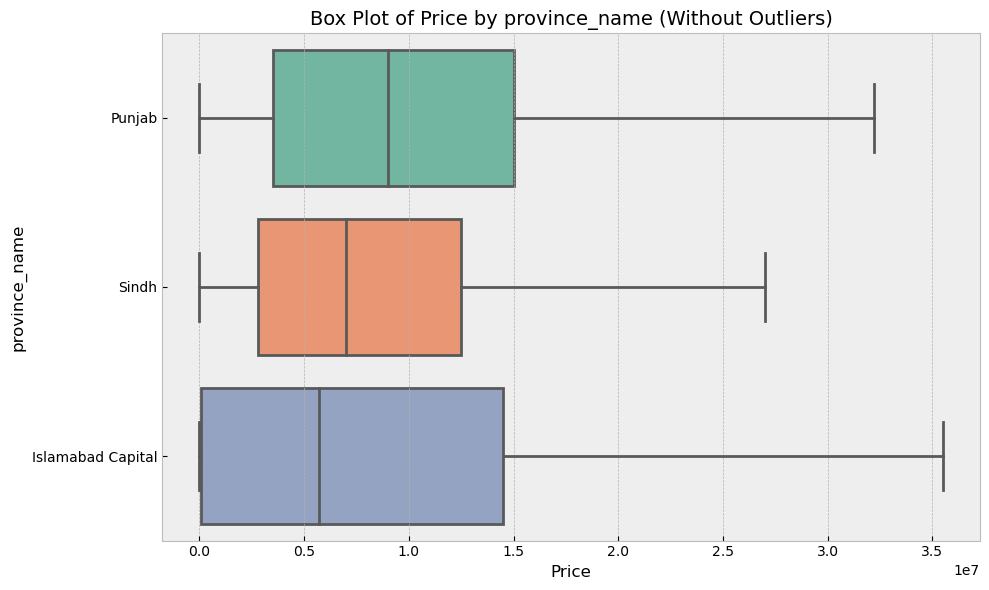

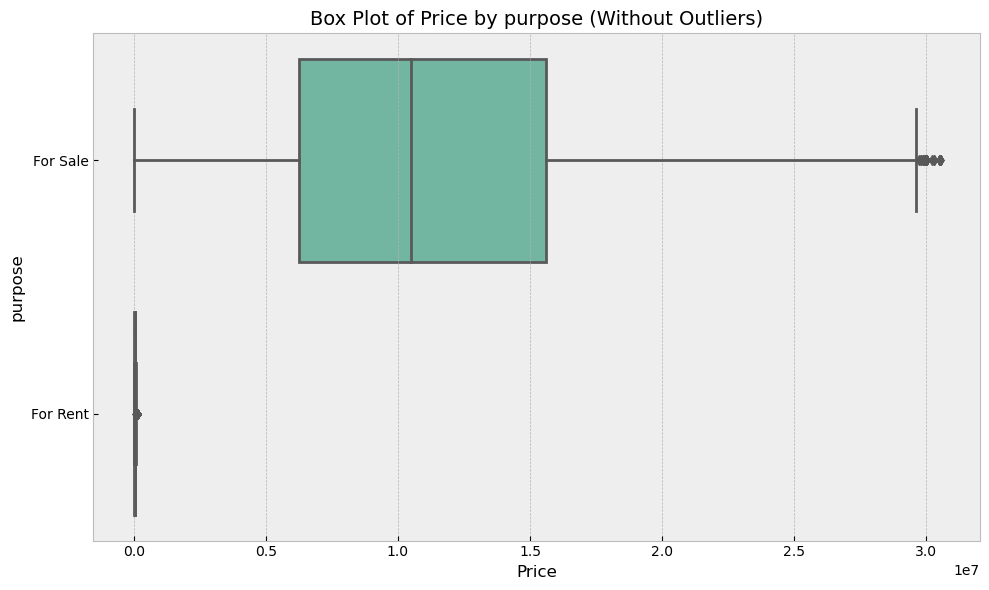

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Function to remove outliers based on IQR
def remove_outliers(df, group_col, value_col):
    filtered_df = pd.DataFrame()
    for category in df[group_col].unique():
        group_data = df[df[group_col] == category]
        Q1 = group_data[value_col].quantile(0.25)  # First quartile
        Q3 = group_data[value_col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        group_filtered = group_data[(group_data[value_col] >= lower_bound) & (group_data[value_col] <= upper_bound)]
        filtered_df = pd.concat([filtered_df, group_filtered], axis=0)
    return filtered_df

# Loop through each categorical column
for cat_col in categorical_columns:
    # Remove outliers for the 'Price' column based on the current category
    df = remove_outliers(df, group_col=cat_col, value_col='price')  # Overwrite df with filtered data
    
    # Create horizontal box plot
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(data=df, y=cat_col, x='price', palette='Set2')  # Horizontal orientation
    plt.title(f'Box Plot of Price by {cat_col} (Without Outliers)', fontsize=14)
    plt.xlabel('Price', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

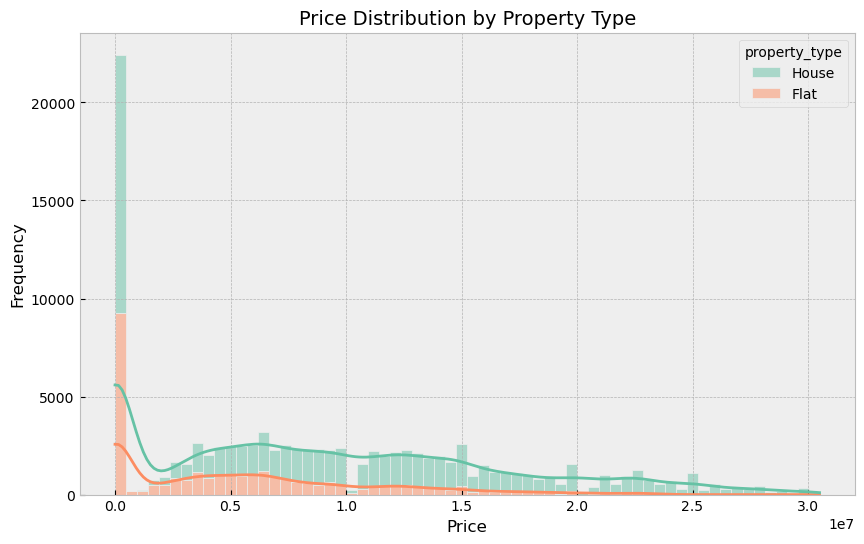

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram of 'price' grouped by 'property_type'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='property_type', multiple='stack', kde=True, palette='Set2')

# Add labels and title
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Price Distribution by Property Type', fontsize=14)

# Show the plot
plt.show()

In [41]:
# Calculate mean, median, and mode of the 'price' column
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # mode() returns a Series, so we take the first value

# Display the results
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")

Mean Price: 9146963.108617265
Median Price: 8000000.0
Mode Price: 15000000


Data Consist of two differnet composition of statistics for House and Flat. So we would run seperate regression for house and flat

In [42]:
# Group by 'property_type' and compute mean, min, and max of 'price'
df_group = df.groupby('property_type')['price'].agg(['mean', 'min', 'max']).reset_index()

# Rename columns for clarity (optional)
df_group.rename(columns={'mean': 'Mean Price', 'min': 'Min Price', 'max': 'Max Price'}, inplace=True)

# Display the result
print(df_group)

  property_type    Mean Price  Min Price  Max Price
0          Flat  5.552260e+06          1   23800000
1         House  1.059363e+07          0   30500000


In [43]:
df1=df.copy()

In [44]:
# For 'House' and 'For Sale' retain rows with 6-digit price
filtered_df = df[(df['price_digit_length'] >= 7)]

# Reset the index after filtering
filtered_df = filtered_df.reset_index(drop=True)
df=filtered_df.copy()

In [45]:
# Group by 'property_type' and compute mean, min, and max of 'price'
df_group = df.groupby('property_type')['price'].agg(['mean', 'min', 'max']).reset_index()

# Rename columns for clarity (optional)
df_group.rename(columns={'mean': 'Mean Price', 'min': 'Min Price', 'max': 'Max Price'}, inplace=True)

# Display the result
print(df_group)

  property_type    Mean Price  Min Price  Max Price
0          Flat  8.101782e+06    1000000   23800000
1         House  1.288583e+07    1000000   30500000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

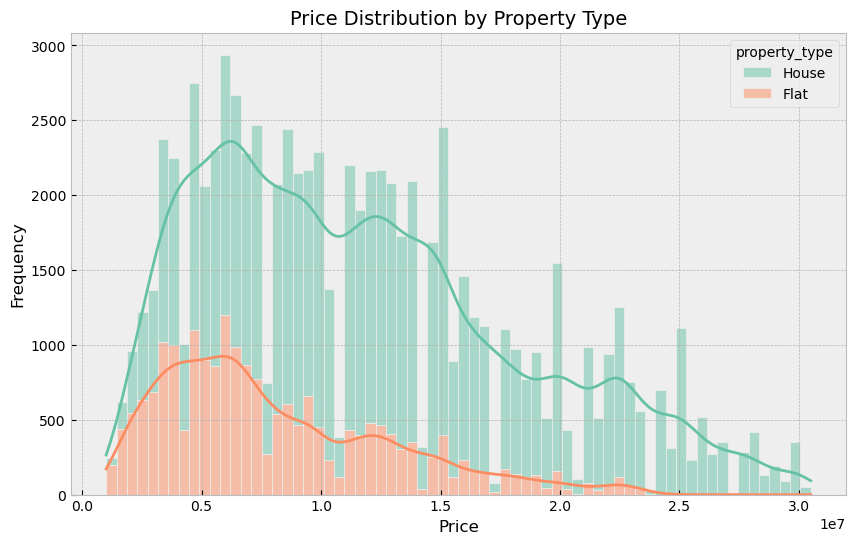

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram of 'price' grouped by 'property_type'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='property_type', multiple='stack', kde=True, palette='Set2')

# Add labels and title
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Price Distribution by Property Type', fontsize=14)

# Show the plot
plt.show()

In [47]:
# Filter rows where 'purpose' is 'For Sale'
df = df[df['purpose'] == 'For Sale']
# Drop the 'purpose' column
df = df.drop(columns=['purpose'])
df.head()

,property_type,price,city,province_name,baths,bedrooms,price_digit_length,Area
0,House,9500000,Lahore,Punjab,0,3,7,9.0
1,House,21000000,Lahore,Punjab,5,6,8,11.0
2,House,16500000,Lahore,Punjab,7,6,8,8.0
3,House,13500000,Lahore,Punjab,4,4,8,7.5
4,House,8500000,Lahore,Punjab,4,4,7,5.0


In [48]:
#df=filtered_df.copy()
#df.drop("price_category", axis=1, inplace=True)
df.drop('price_digit_length', axis=1, inplace=True)
#df.drop('city', axis=1, inplace=True)
df.head()

,property_type,price,city,province_name,baths,bedrooms,Area
0,House,9500000,Lahore,Punjab,0,3,9.0
1,House,21000000,Lahore,Punjab,5,6,11.0
2,House,16500000,Lahore,Punjab,7,6,8.0
3,House,13500000,Lahore,Punjab,4,4,7.5
4,House,8500000,Lahore,Punjab,4,4,5.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

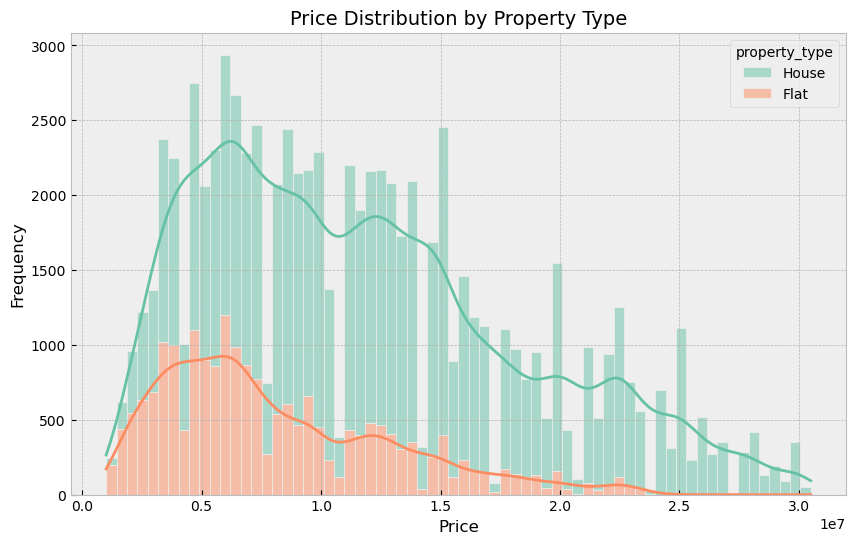

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram of 'price' grouped by 'property_type'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='property_type', multiple='stack', kde=True, palette='Set2')

# Add labels and title
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Price Distribution by Property Type', fontsize=14)

# Show the plot
plt.show()

# Create dummy variables

In [50]:
import pandas as pd

# Identify all object (categorical) columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables (numeric 0 and 1)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Identify all object columns
object_columns = df.select_dtypes(include=['bool']).columns

# Replace True/False with 1/0 in object columns and convert them to integers
df[object_columns] = df[object_columns].replace({True: 1, False: 0}).astype(int)


C:\Users\HP\AppData\Local\Temp\ipykernel_20220\2851842740.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[object_columns] = df[object_columns].replace({True: 1, False: 0}).astype(int)


In [51]:
df.head()

,price,baths,bedrooms,Area,property_type_House,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Punjab,province_name_Sindh
0,9500000,0,3,9.0,1,0,0,1,0,1,0
1,21000000,5,6,11.0,1,0,0,1,0,1,0
2,16500000,7,6,8.0,1,0,0,1,0,1,0
3,13500000,4,4,7.5,1,0,0,1,0,1,0
4,8500000,4,4,5.0,1,0,0,1,0,1,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81090 entries, 0 to 81089
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 81090 non-null  int64  
 1   baths                 81090 non-null  int64  
 2   bedrooms              81090 non-null  int64  
 3   Area                  81090 non-null  float64
 4   property_type_House   81090 non-null  int32  
 5   city_Islamabad        81090 non-null  int32  
 6   city_Karachi          81090 non-null  int32  
 7   city_Lahore           81090 non-null  int32  
 8   city_Rawalpindi       81090 non-null  int32  
 9   province_name_Punjab  81090 non-null  int32  
 10  province_name_Sindh   81090 non-null  int32  
dtypes: float64(1), int32(7), int64(3)
memory usage: 4.6 MB


# Testing Basic Assumptions of Linear Regression Model

### Testing Normality of Dependent Column

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


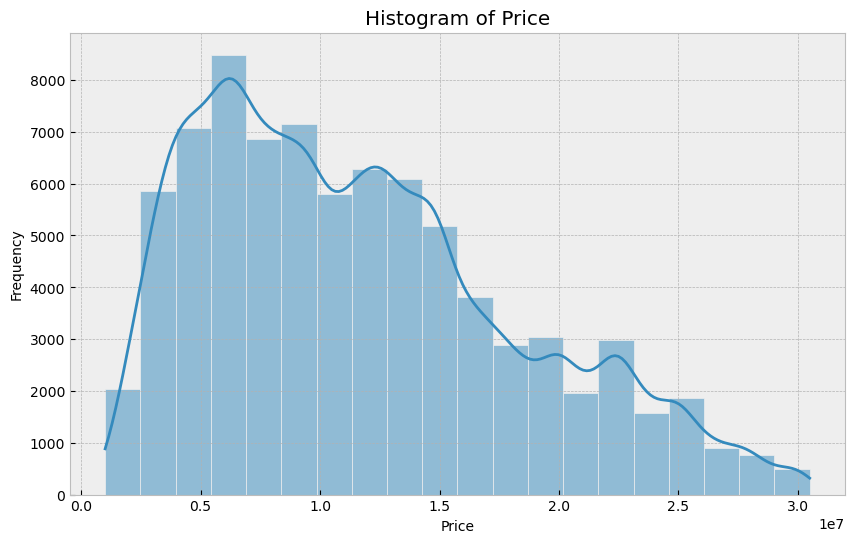

<Figure size 1000x600 with 0 Axes>

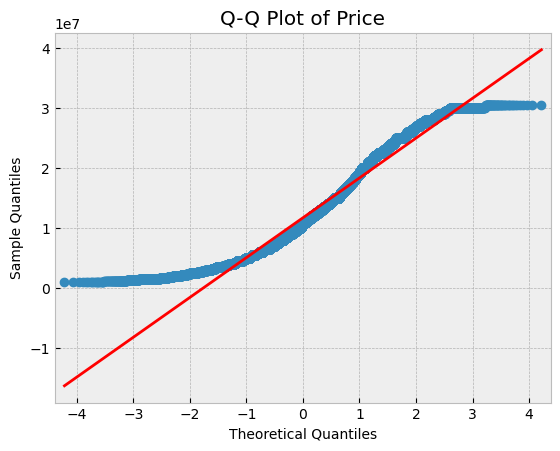

Shapiro-Wilk test for normality:
Statistic: 0.9497473239898682 p-value: 0.0

Anderson-Darling Test for normality:
Statistic: 1130.2980462202395
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance level: [15.  10.   5.   2.5  1. ]


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# Define dependent variable (price)
y = df['price']

# 1. Histogram for Normality Check
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=20)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q Plot for Normality Check
plt.figure(figsize=(10, 6))
qqplot(y, line='s')
plt.title('Q-Q Plot of Price')
plt.show()

# 3. Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(y)
print("Shapiro-Wilk test for normality:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# If p-value > 0.05, the data is normally distributed.

# 4. Anderson-Darling Test for Normality
anderson_test = stats.anderson(y, dist='norm')
print("\nAnderson-Darling Test for normality:")
print("Statistic:", anderson_test.statistic)
print("Critical values:", anderson_test.critical_values)
print("Significance level:", anderson_test.significance_level)

Dependent columns is not normal that main issue need to be resolved such as log transformation or any other method

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


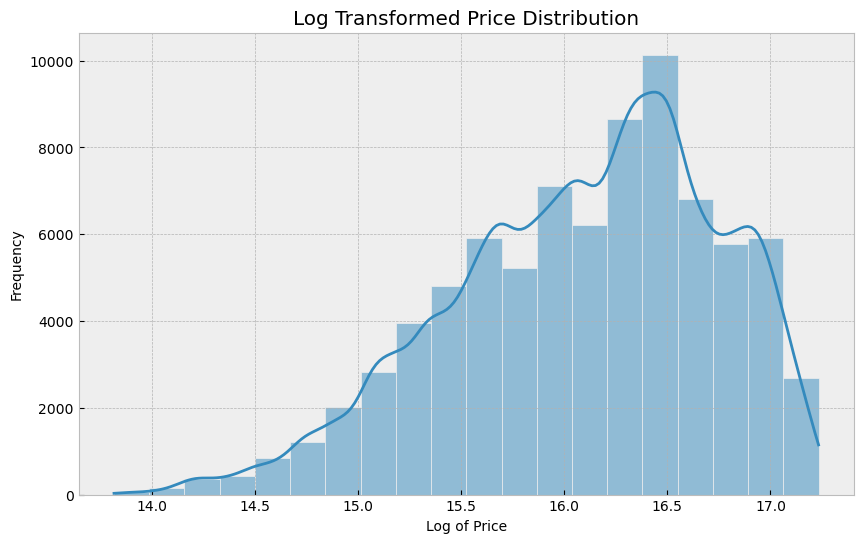

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Log transformation of price column
df['log_price'] = np.log(df['price'])

# Check the distribution of the log-transformed price
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=20)
plt.title('Log Transformed Price Distribution')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


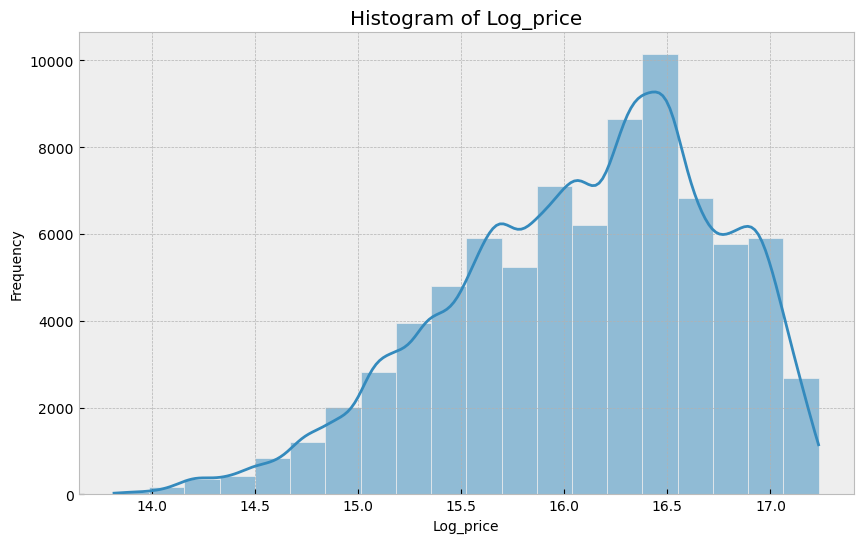

<Figure size 1000x600 with 0 Axes>

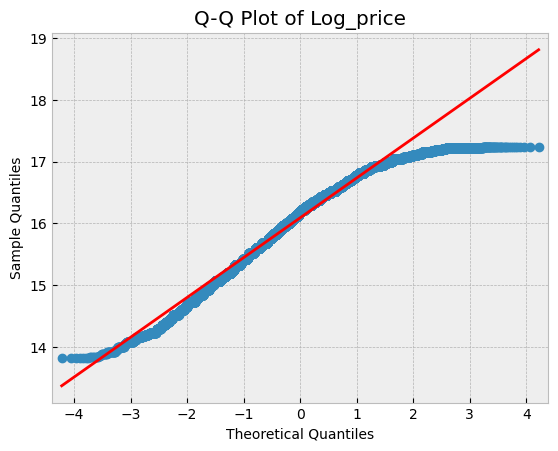

Shapiro-Wilk test for normality:
Statistic: 0.9735408425331116 p-value: 0.0

Anderson-Darling Test for normality:
Statistic: 504.52772040521086
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance level: [15.  10.   5.   2.5  1. ]


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# Define dependent variable (log_price)
y = df['log_price']

# 1. Histogram for Normality Check
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=20)
plt.title('Histogram of Log_price')
plt.xlabel('Log_price')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q Plot for Normality Check
plt.figure(figsize=(10, 6))
qqplot(y, line='s')
plt.title('Q-Q Plot of Log_price')
plt.show()

# 3. Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(y)
print("Shapiro-Wilk test for normality:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# If p-value > 0.05, the data is normally distributed.

# 4. Anderson-Darling Test for Normality
anderson_test = stats.anderson(y, dist='norm')
print("\nAnderson-Darling Test for normality:")
print("Statistic:", anderson_test.statistic)
print("Critical values:", anderson_test.critical_values)
print("Significance level:", anderson_test.significance_level)

In [56]:
# Get the maximum value of the 'price' column
max_price = df['price'].max()

# Get the minimum value of the 'price' column
min_price = df['price'].min()

# Print the results
print(f"Maximum Price: {max_price}")
print(f"Minimum Price: {min_price}")

Maximum Price: 30500000
Minimum Price: 1000000


In [57]:
df_f=df.copy()

In [58]:
df = df.drop('log_price', axis=1)
df.head()

,price,baths,bedrooms,Area,property_type_House,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Punjab,province_name_Sindh
0,9500000,0,3,9.0,1,0,0,1,0,1,0
1,21000000,5,6,11.0,1,0,0,1,0,1,0
2,16500000,7,6,8.0,1,0,0,1,0,1,0
3,13500000,4,4,7.5,1,0,0,1,0,1,0
4,8500000,4,4,5.0,1,0,0,1,0,1,0


# Predictive Modeling

In [59]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

In [60]:
# Define dependent variable (price) and independent variables (all other columns)
y = df['price']
X = df.drop('price', axis=1)

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                 1.783e+04
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:27:13   Log-Likelihood:            -1.3477e+06
No. Observations:               81090   AIC:                         2.695e+06
Df Residuals:                   81081   BIC:                         2.696e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.312e+06 

## Model Dignostic Checks

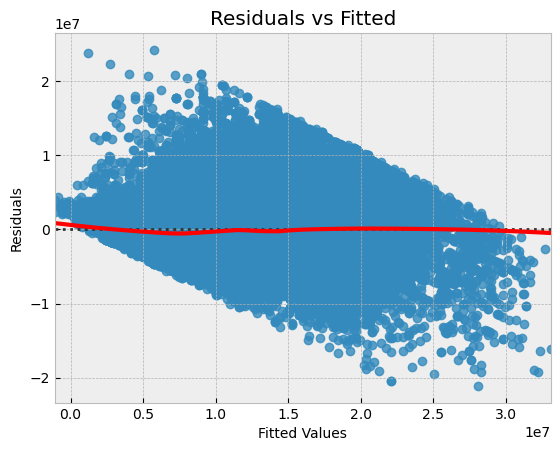

In [61]:
# 1. Residuals Analysis: Plot residuals vs. fitted values (check for randomness)
sns.residplot(x=results.fittedvalues, y=results.resid, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [62]:
# 2. Check for Heteroscedasticity using Breusch-Pagan Test
bp_test = het_breuschpagan(results.resid, results.model.exog)
print("Breusch-Pagan test results:")
print("LM Statistic:", bp_test[0])
print("p-value:", bp_test[1])

Breusch-Pagan test results:
LM Statistic: 8887.595699224716
p-value: 0.0


In [63]:
# 3. Check for Multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factors (VIF):
                Variable       VIF
0                  const  0.000000
1                  baths  1.937867
2               bedrooms  2.208963
3                   Area  1.308334
4    property_type_House  1.631063
5         city_Islamabad       inf
6           city_Karachi       inf
7            city_Lahore  5.829918
8        city_Rawalpindi  3.330103
9   province_name_Punjab       inf
10   province_name_Sindh       inf


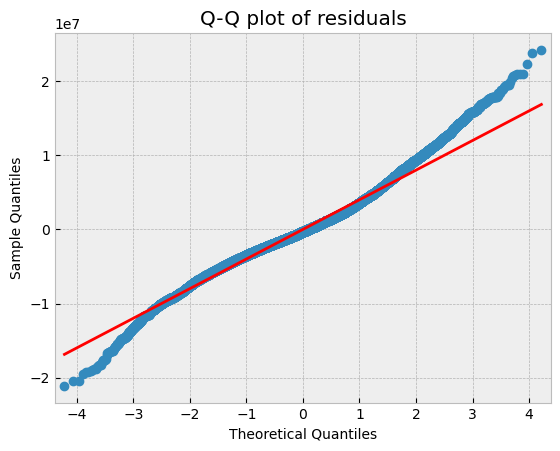

In [64]:
# 4. Normality of residuals using Q-Q plot
qqplot(results.resid, line='s')
plt.title("Q-Q plot of residuals")
plt.show()

In [65]:
# 5. Test for Normality of residuals using Shapiro-Wilk test
shapiro_test = stats.shapiro(results.resid)
print("\nShapiro-Wilk test for normality:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])


Shapiro-Wilk test for normality:
Statistic: 0.9791159629821777 p-value: 0.0


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [66]:
# 6. Identify influential points using leverage and Cook's distance
influence = results.get_influence()
cooks_distance = influence.cooks_distance[0]

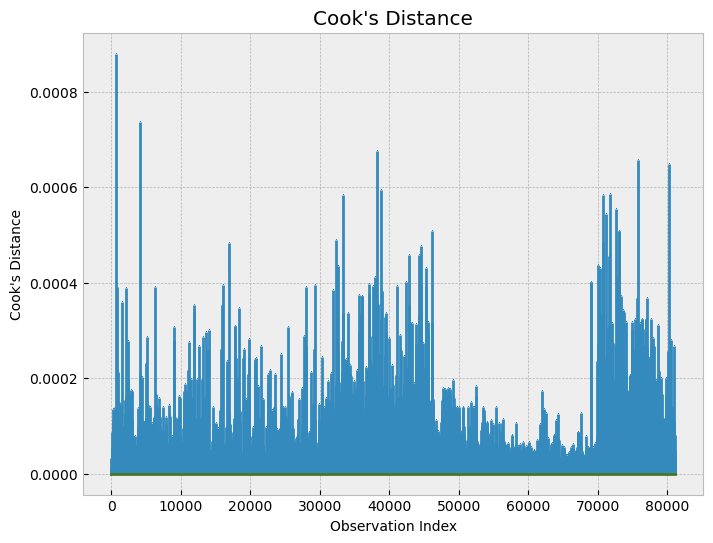

In [67]:
# Plot Cook's Distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

In [68]:
# 7. Check if residuals are autocorrelated using Durbin-Watson test
dw_statistic = sm.stats.durbin_watson(results.resid)
print("\nDurbin-Watson statistic:", dw_statistic)


Durbin-Watson statistic: 1.4654425254111638


Data set still contains hetrosedasity not working with log transformation or any other method of transformation

## Using Weighted Least Square Regression Model

In [69]:
import statsmodels.api as sm
import numpy as np

# Step 1: Fit OLS model to calculate residuals
y = df['price']
X = df.drop('price', axis=1)
X = sm.add_constant(X)

ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
residuals = ols_results.resid

# Step 2: Calculate weights
weights = 1 / (residuals**2 + 1e-6)  # Avoid division by zero with a small constant

# Step 3: Fit the WLS model
wls_model = sm.WLS(y, X, weights=weights)
wls_results = wls_model.fit()

# Step 4: Print WLS results summary
print(wls_results.summary())

# Step 5: (Optional) Use robust standard errors if needed
robust_results = wls_model.fit(cov_type='HC3')
print(robust_results.summary())


                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.404e+10
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:28:20   Log-Likelihood:            -1.2867e+06
No. Observations:               81090   AIC:                         2.573e+06
Df Residuals:                   81081   BIC:                         2.573e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.319e+06 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 feature       VIF
0                  const  0.000000
1                  baths  1.937867
2               bedrooms  2.208963
3                   Area  1.308334
4    property_type_House  1.631063
5         city_Islamabad       inf
6           city_Karachi       inf
7            city_Lahore  5.829918
8        city_Rawalpindi  3.330103
9   province_name_Punjab       inf
10   province_name_Sindh       inf


In [71]:
df_f.columns

Index(['price', 'baths', 'bedrooms', 'Area', 'property_type_House',
       'city_Islamabad', 'city_Karachi', 'city_Lahore', 'city_Rawalpindi',
       'province_name_Punjab', 'province_name_Sindh', 'log_price'],
      dtype='object')

In [72]:
import statsmodels.api as sm

# Example: Use the inverse of the fitted values as weights (or some other function of the data)
weights = 1 / (df['price'] ** 2)  # This is just an example

# Fit Weighted Least Squares (WLS) model
wls_model = sm.WLS(df['price'], sm.add_constant(df[['baths', 'bedrooms', 'Area', 'property_type_House',
       'city_Islamabad', 'city_Karachi', 'city_Lahore', 'city_Rawalpindi',
       'province_name_Punjab', 'province_name_Sindh']]), weights=weights).fit()
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            WLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 1.208e+04
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:28:20   Log-Likelihood:            -1.3498e+06
No. Observations:               81090   AIC:                         2.700e+06
Df Residuals:                   81081   BIC:                         2.700e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -1.07e+06 

## END OF NOTEBOOK